# MSDS692 Data Science Practicum 1
**Description**  

The purpose of this project is to build a recommender and classifier that a FIRST Robotics team, FIRST Robotic Competition (FRC) could use to select the best possible alliance partners for the final rounds.  A secondary goal will be to build a curriculum that can be used to teach the high students what Data Science is and how they can use it without having in-depth knowledge of the math and techniques.
 
During qualifying rounds teams are randomly grouped into two alliances of three teams each. At the end of qualifying, the top eight teams choose who their alliance partners will be.  Match scores are recorded for each alliance.  

**Hypothosis**  

My hypothesis is that by analyzing historical match scores a recommender can be developed. Match data can be divided into two parts. The qualifying round data will be used to develop the recommender and the team classifier.  Verification data can be derived from the final round data. There will be challenges with the verification data.  Since the alliances were not chosen with this system in place the alliances formed may not reflect what the recommender would have chosen.  Alliances are made up of three teams, so the recommender could match two or three teams in the verification data.  Allowances will have to be made when comparing the recommendations to the final rounds.   

**Assumptions**  

Because scores that are reported for an alliance and not individual teams. As I assign the alliance scores to a specific team, I am assuming that better team will aquire higher scores over the course of a qualifing rounds.  

I also assume that there will be other criteria collected at the regional in addition for making the final alliance selections by the team.  


### References

https://stackoverflow.com/questions/3451111/unzipping-files-in-python  
https://stackoverflow.com/questions/47379476/how-to-convert-bytes-data-into-a-python-pandas-dataframe  
https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/ 
https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/  
https://machinelearningmastery.com/make-predictions-scikit-learn/  
http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode63.html  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html  
https://pythonprogramming.net/mean-shift-titanic-dataset-machine-learning-tutorial/  


**TODO**  
- convert code from notebook to .py file
- build deployable code that will process the past data and build the model into a .py file
- build a defined function to preprocess data from a regional into the correct format  
- build a defined function that will download the data from a specific regional for scouting to use

In [1]:
#Libraries
import pandas as pd
import numpy as np
import zipfile 
import re
import os
from io import StringIO
from matplotlib import pyplot as plt

In [ ]:
#format the work space
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

## Load Data 


The data in the file is divided into two master folders one is the event folder and the other is the teams folders. the event folder has all of the event data from year 1992 to 2019.  To build and data structures and get an initial feel for the data I am going to extract 3 event from each year for 2017, 2018 and 2019.  Event folder have the following csv files in them [event]_alliance.csv, [event]_awards.csv,[event]_matches.csv, [event]_rankings.csv,[event]_teams.csv

In [3]:
# Variables

#set the working directorice for the data extraction
working_dir = os.getcwd() 
data_path = os.path.join(working_dir,'Data')

# Define the data frame column name for the imported csv files
match_col = ['YYYYreg_match','blue1','blue2','blue3','red1','red2','red3','blue_score','red_score'] #column heading have been infered from my knowledge
award_col =  ['event','award_name', 'team', 'awardee']

my_team = 'frc2996'  # this is the team the recomendations will be performed for
#my_regional =   # the regional identifier for the subject regional

#is the source data in a zip file or in extracted folders
zip_source = True

#testing variables
#match_t = pd.read_csv(os.path.join(data_path,'2017abca','2017abca_matches.csv'),names = match_col)
#rank_t = pd.read_csv(os.path.join(data_path,'2017abca','2017abca_rankings.csv'))

In [4]:
# use this code to retrieves the data from the the zip file

# TODO when ready to perform analysis change the name of the match and ranking DF
if zip_source:
    matches_df = pd.DataFrame(columns= match_col)  # open a blank Data Frame
    ranking_df = pd.DataFrame()  # open a blank Data Frame
    awards_df   = pd.DataFrame(columns = award_col)

    #variable
    file = zipfile.ZipFile(os.path.join(working_dir,'the-blue-alliance-data-master2019.zip'), 'r')
    start_year = 2016  # use this variable to limit the number of year in the past that is use for analysis

    for f in file.namelist():
        yy = re.split('/',f,5)
        if yy[1] == 'events':
    #        print('event')
            if yy[2] and int(yy[2]) >= start_year: # and int(yy[2]) < 2018:
                if f.endswith('_matches.csv'):
                    print(f)
    #                counter += 1
                    data = file.read(f)
                    data = str(data, 'utf-8')
                    z = StringIO(data)
                    temp = pd.read_csv(z,names = match_col)
                    matches_df = matches_df.append(temp, ignore_index=True,sort=False)
                if f.endswith('_rankings.csv'):
                    print(f)
                    data = file.read(f)
                    data = str(data, 'utf-8')
                    z = StringIO(data)
                    temp = pd.read_csv(z)
                    temp['regional'] = yy[3] #f[:9]
                    Tranking_df = ranking_df.append(temp, ignore_index=True,sort=False)
                if f.endswith('_awards.csv'):
                    print(f)
                    data = file.read(f)
                    data = str(data, 'utf-8')
                    z = StringIO(data)
                    temp = pd.read_csv(z, names= award_col)
                    awards_df = awards_df.append(temp, ignore_index=True,sort=False)

the-blue-alliance-data-master/events/2016/2016abca/2016abca_awards.csv
the-blue-alliance-data-master/events/2016/2016abca/2016abca_matches.csv
the-blue-alliance-data-master/events/2016/2016abca/2016abca_rankings.csv
the-blue-alliance-data-master/events/2016/2016alhu/2016alhu_awards.csv
the-blue-alliance-data-master/events/2016/2016alhu/2016alhu_matches.csv
the-blue-alliance-data-master/events/2016/2016alhu/2016alhu_rankings.csv
the-blue-alliance-data-master/events/2016/2016arc/2016arc_awards.csv
the-blue-alliance-data-master/events/2016/2016arc/2016arc_matches.csv
the-blue-alliance-data-master/events/2016/2016arc/2016arc_rankings.csv
the-blue-alliance-data-master/events/2016/2016arlr/2016arlr_awards.csv
the-blue-alliance-data-master/events/2016/2016arlr/2016arlr_matches.csv
the-blue-alliance-data-master/events/2016/2016arlr/2016arlr_rankings.csv
the-blue-alliance-data-master/events/2016/2016ausy/2016ausy_awards.csv
the-blue-alliance-data-master/events/2016/2016ausy/2016ausy_matches.csv

the-blue-alliance-data-master/events/2016/2016hiho/2016hiho_rankings.csv
the-blue-alliance-data-master/events/2016/2016hop/2016hop_awards.csv
the-blue-alliance-data-master/events/2016/2016hop/2016hop_matches.csv
the-blue-alliance-data-master/events/2016/2016hop/2016hop_rankings.csv
the-blue-alliance-data-master/events/2016/2016iacf/2016iacf_awards.csv
the-blue-alliance-data-master/events/2016/2016iacf/2016iacf_matches.csv
the-blue-alliance-data-master/events/2016/2016iacf/2016iacf_rankings.csv
the-blue-alliance-data-master/events/2016/2016idbo/2016idbo_awards.csv
the-blue-alliance-data-master/events/2016/2016idbo/2016idbo_matches.csv
the-blue-alliance-data-master/events/2016/2016idbo/2016idbo_rankings.csv
the-blue-alliance-data-master/events/2016/2016ilch/2016ilch_awards.csv
the-blue-alliance-data-master/events/2016/2016ilch/2016ilch_matches.csv
the-blue-alliance-data-master/events/2016/2016ilch/2016ilch_rankings.csv
the-blue-alliance-data-master/events/2016/2016ilpe/2016ilpe_awards.cs

the-blue-alliance-data-master/events/2016/2016mimid/2016mimid_rankings.csv
the-blue-alliance-data-master/events/2016/2016misjo/2016misjo_awards.csv
the-blue-alliance-data-master/events/2016/2016misjo/2016misjo_matches.csv
the-blue-alliance-data-master/events/2016/2016misjo/2016misjo_rankings.csv
the-blue-alliance-data-master/events/2016/2016misou/2016misou_awards.csv
the-blue-alliance-data-master/events/2016/2016misou/2016misou_matches.csv
the-blue-alliance-data-master/events/2016/2016misou/2016misou_rankings.csv
the-blue-alliance-data-master/events/2016/2016mista/2016mista_awards.csv
the-blue-alliance-data-master/events/2016/2016mista/2016mista_matches.csv
the-blue-alliance-data-master/events/2016/2016mista/2016mista_rankings.csv
the-blue-alliance-data-master/events/2016/2016mitry/2016mitry_awards.csv
the-blue-alliance-data-master/events/2016/2016mitry/2016mitry_matches.csv
the-blue-alliance-data-master/events/2016/2016mitry/2016mitry_rankings.csv
the-blue-alliance-data-master/events/

the-blue-alliance-data-master/events/2016/2016nyro/2016nyro_rankings.csv
the-blue-alliance-data-master/events/2016/2016nyrr/2016nyrr_awards.csv
the-blue-alliance-data-master/events/2016/2016nyrr/2016nyrr_matches.csv
the-blue-alliance-data-master/events/2016/2016nyrr/2016nyrr_rankings.csv
the-blue-alliance-data-master/events/2016/2016nytr/2016nytr_awards.csv
the-blue-alliance-data-master/events/2016/2016nytr/2016nytr_matches.csv
the-blue-alliance-data-master/events/2016/2016nytr/2016nytr_rankings.csv
the-blue-alliance-data-master/events/2016/2016nytv/2016nytv_awards.csv
the-blue-alliance-data-master/events/2016/2016nytv/2016nytv_matches.csv
the-blue-alliance-data-master/events/2016/2016nytv/2016nytv_rankings.csv
the-blue-alliance-data-master/events/2016/2016ohci/2016ohci_awards.csv
the-blue-alliance-data-master/events/2016/2016ohci/2016ohci_matches.csv
the-blue-alliance-data-master/events/2016/2016ohci/2016ohci_rankings.csv
the-blue-alliance-data-master/events/2016/2016ohcl/2016ohcl_awa

the-blue-alliance-data-master/events/2017/2017code/2017code_matches.csv
the-blue-alliance-data-master/events/2017/2017code/2017code_rankings.csv
the-blue-alliance-data-master/events/2017/2017crc/2017crc_matches.csv
the-blue-alliance-data-master/events/2017/2017crc/2017crc_rankings.csv
the-blue-alliance-data-master/events/2017/2017crc2/2017crc2_matches.csv
the-blue-alliance-data-master/events/2017/2017cthar/2017cthar_awards.csv
the-blue-alliance-data-master/events/2017/2017cthar/2017cthar_matches.csv
the-blue-alliance-data-master/events/2017/2017cthar/2017cthar_rankings.csv
the-blue-alliance-data-master/events/2017/2017ctsc/2017ctsc_matches.csv
the-blue-alliance-data-master/events/2017/2017ctsc/2017ctsc_rankings.csv
the-blue-alliance-data-master/events/2017/2017cttd/2017cttd_matches.csv
the-blue-alliance-data-master/events/2017/2017cttd/2017cttd_rankings.csv
the-blue-alliance-data-master/events/2017/2017ctwat/2017ctwat_awards.csv
the-blue-alliance-data-master/events/2017/2017ctwat/2017c

the-blue-alliance-data-master/events/2017/2017mabos/2017mabos_matches.csv
the-blue-alliance-data-master/events/2017/2017mabos/2017mabos_rankings.csv
the-blue-alliance-data-master/events/2017/2017mabri/2017mabri_awards.csv
the-blue-alliance-data-master/events/2017/2017mabri/2017mabri_matches.csv
the-blue-alliance-data-master/events/2017/2017mabri/2017mabri_rankings.csv
the-blue-alliance-data-master/events/2017/2017marea/2017marea_awards.csv
the-blue-alliance-data-master/events/2017/2017marea/2017marea_matches.csv
the-blue-alliance-data-master/events/2017/2017marea/2017marea_rankings.csv
the-blue-alliance-data-master/events/2017/2017mawor/2017mawor_awards.csv
the-blue-alliance-data-master/events/2017/2017mawor/2017mawor_matches.csv
the-blue-alliance-data-master/events/2017/2017mawor/2017mawor_rankings.csv
the-blue-alliance-data-master/events/2017/2017mdbb/2017mdbb_matches.csv
the-blue-alliance-data-master/events/2017/2017mdbb/2017mdbb_rankings.csv
the-blue-alliance-data-master/events/201

the-blue-alliance-data-master/events/2017/2017miwmi/2017miwmi_rankings.csv
the-blue-alliance-data-master/events/2017/2017mncmp/2017mncmp_matches.csv
the-blue-alliance-data-master/events/2017/2017mncmp/2017mncmp_rankings.csv
the-blue-alliance-data-master/events/2017/2017mndu/2017mndu_awards.csv
the-blue-alliance-data-master/events/2017/2017mndu/2017mndu_matches.csv
the-blue-alliance-data-master/events/2017/2017mndu/2017mndu_rankings.csv
the-blue-alliance-data-master/events/2017/2017mndu2/2017mndu2_awards.csv
the-blue-alliance-data-master/events/2017/2017mndu2/2017mndu2_matches.csv
the-blue-alliance-data-master/events/2017/2017mndu2/2017mndu2_rankings.csv
the-blue-alliance-data-master/events/2017/2017mnemcc/2017mnemcc_awards.csv
the-blue-alliance-data-master/events/2017/2017mnemcc/2017mnemcc_matches.csv
the-blue-alliance-data-master/events/2017/2017mnemcc/2017mnemcc_rankings.csv
the-blue-alliance-data-master/events/2017/2017mngggt/2017mngggt_matches.csv
the-blue-alliance-data-master/even

the-blue-alliance-data-master/events/2017/2017nyrr/2017nyrr_awards.csv
the-blue-alliance-data-master/events/2017/2017nyrr/2017nyrr_matches.csv
the-blue-alliance-data-master/events/2017/2017nyrr/2017nyrr_rankings.csv
the-blue-alliance-data-master/events/2017/2017nysu/2017nysu_awards.csv
the-blue-alliance-data-master/events/2017/2017nysu/2017nysu_matches.csv
the-blue-alliance-data-master/events/2017/2017nysu/2017nysu_rankings.csv
the-blue-alliance-data-master/events/2017/2017nytr/2017nytr_awards.csv
the-blue-alliance-data-master/events/2017/2017nytr/2017nytr_matches.csv
the-blue-alliance-data-master/events/2017/2017nytr/2017nytr_rankings.csv
the-blue-alliance-data-master/events/2017/2017nytv/2017nytv_awards.csv
the-blue-alliance-data-master/events/2017/2017nytv/2017nytv_matches.csv
the-blue-alliance-data-master/events/2017/2017nytv/2017nytv_rankings.csv
the-blue-alliance-data-master/events/2017/2017ohcl/2017ohcl_awards.csv
the-blue-alliance-data-master/events/2017/2017ohcl/2017ohcl_match

the-blue-alliance-data-master/events/2017/2017txri/2017txri_matches.csv
the-blue-alliance-data-master/events/2017/2017txri/2017txri_rankings.csv
the-blue-alliance-data-master/events/2017/2017txrm/2017txrm_matches.csv
the-blue-alliance-data-master/events/2017/2017txrm/2017txrm_rankings.csv
the-blue-alliance-data-master/events/2017/2017txrr/2017txrr_matches.csv
the-blue-alliance-data-master/events/2017/2017txrr/2017txrr_rankings.csv
the-blue-alliance-data-master/events/2017/2017txsa/2017txsa_awards.csv
the-blue-alliance-data-master/events/2017/2017txsa/2017txsa_matches.csv
the-blue-alliance-data-master/events/2017/2017txsa/2017txsa_rankings.csv
the-blue-alliance-data-master/events/2017/2017txsc/2017txsc_matches.csv
the-blue-alliance-data-master/events/2017/2017txsc/2017txsc_rankings.csv
the-blue-alliance-data-master/events/2017/2017txwa/2017txwa_awards.csv
the-blue-alliance-data-master/events/2017/2017txwa/2017txwa_matches.csv
the-blue-alliance-data-master/events/2017/2017txwa/2017txwa_r

the-blue-alliance-data-master/events/2018/2018cair/2018cair_awards.csv
the-blue-alliance-data-master/events/2018/2018cair/2018cair_matches.csv
the-blue-alliance-data-master/events/2018/2018capo/2018capo_awards.csv
the-blue-alliance-data-master/events/2018/2018capo/2018capo_matches.csv
the-blue-alliance-data-master/events/2018/2018cars/2018cars_awards.csv
the-blue-alliance-data-master/events/2018/2018cars/2018cars_matches.csv
the-blue-alliance-data-master/events/2018/2018carv/2018carv_awards.csv
the-blue-alliance-data-master/events/2018/2018carv/2018carv_matches.csv
the-blue-alliance-data-master/events/2018/2018casd/2018casd_awards.csv
the-blue-alliance-data-master/events/2018/2018casd/2018casd_matches.csv
the-blue-alliance-data-master/events/2018/2018casf/2018casf_awards.csv
the-blue-alliance-data-master/events/2018/2018casf/2018casf_matches.csv
the-blue-alliance-data-master/events/2018/2018casj/2018casj_awards.csv
the-blue-alliance-data-master/events/2018/2018casj/2018casj_matches.csv

the-blue-alliance-data-master/events/2018/2018mawor/2018mawor_awards.csv
the-blue-alliance-data-master/events/2018/2018mawor/2018mawor_matches.csv
the-blue-alliance-data-master/events/2018/2018mdbb/2018mdbb_matches.csv
the-blue-alliance-data-master/events/2018/2018mdedg/2018mdedg_awards.csv
the-blue-alliance-data-master/events/2018/2018mdedg/2018mdedg_matches.csv
the-blue-alliance-data-master/events/2018/2018mdoxo/2018mdoxo_awards.csv
the-blue-alliance-data-master/events/2018/2018mdoxo/2018mdoxo_matches.csv
the-blue-alliance-data-master/events/2018/2018melew/2018melew_awards.csv
the-blue-alliance-data-master/events/2018/2018melew/2018melew_matches.csv
the-blue-alliance-data-master/events/2018/2018mesh/2018mesh_matches.csv
the-blue-alliance-data-master/events/2018/2018mialp/2018mialp_awards.csv
the-blue-alliance-data-master/events/2018/2018mialp/2018mialp_matches.csv
the-blue-alliance-data-master/events/2018/2018mibb/2018mibb_matches.csv
the-blue-alliance-data-master/events/2018/2018mib

the-blue-alliance-data-master/events/2018/2018ncgre/2018ncgre_awards.csv
the-blue-alliance-data-master/events/2018/2018ncgre/2018ncgre_matches.csv
the-blue-alliance-data-master/events/2018/2018ncpem/2018ncpem_awards.csv
the-blue-alliance-data-master/events/2018/2018ncpem/2018ncpem_matches.csv
the-blue-alliance-data-master/events/2018/2018ncth/2018ncth_matches.csv
the-blue-alliance-data-master/events/2018/2018ncwin/2018ncwin_awards.csv
the-blue-alliance-data-master/events/2018/2018ncwin/2018ncwin_matches.csv
the-blue-alliance-data-master/events/2018/2018ndgf/2018ndgf_awards.csv
the-blue-alliance-data-master/events/2018/2018ndgf/2018ndgf_matches.csv
the-blue-alliance-data-master/events/2018/2018necmp/2018necmp_awards.csv
the-blue-alliance-data-master/events/2018/2018necmp/2018necmp_matches.csv
the-blue-alliance-data-master/events/2018/2018new/2018new_awards.csv
the-blue-alliance-data-master/events/2018/2018new/2018new_matches.csv
the-blue-alliance-data-master/events/2018/2018nhbb/2018nhb

the-blue-alliance-data-master/events/2018/2018qcmo/2018qcmo_awards.csv
the-blue-alliance-data-master/events/2018/2018qcmo/2018qcmo_matches.csv
the-blue-alliance-data-master/events/2018/2018rismi/2018rismi_awards.csv
the-blue-alliance-data-master/events/2018/2018rismi/2018rismi_matches.csv
the-blue-alliance-data-master/events/2018/2018roe/2018roe_awards.csv
the-blue-alliance-data-master/events/2018/2018roe/2018roe_matches.csv
the-blue-alliance-data-master/events/2018/2018rsr/2018rsr_matches.csv
the-blue-alliance-data-master/events/2018/2018rsr/2018rsr_rankings.csv
the-blue-alliance-data-master/events/2018/2018scmb/2018scmb_awards.csv
the-blue-alliance-data-master/events/2018/2018scmb/2018scmb_matches.csv
the-blue-alliance-data-master/events/2018/2018scriw/2018scriw_matches.csv
the-blue-alliance-data-master/events/2018/2018shmi/2018shmi_awards.csv
the-blue-alliance-data-master/events/2018/2018shmi/2018shmi_matches.csv
the-blue-alliance-data-master/events/2018/2018tes/2018tes_awards.csv
t

the-blue-alliance-data-master/events/2019/2019cave/2019cave_awards.csv
the-blue-alliance-data-master/events/2019/2019cave/2019cave_matches.csv
the-blue-alliance-data-master/events/2019/2019chcmp/2019chcmp_awards.csv
the-blue-alliance-data-master/events/2019/2019chcmp/2019chcmp_matches.csv
the-blue-alliance-data-master/events/2019/2019cmpmi/2019cmpmi_awards.csv
the-blue-alliance-data-master/events/2019/2019cmpmi/2019cmpmi_matches.csv
the-blue-alliance-data-master/events/2019/2019cmptx/2019cmptx_awards.csv
the-blue-alliance-data-master/events/2019/2019cmptx/2019cmptx_matches.csv
the-blue-alliance-data-master/events/2019/2019code/2019code_awards.csv
the-blue-alliance-data-master/events/2019/2019code/2019code_matches.csv
the-blue-alliance-data-master/events/2019/2019cthar/2019cthar_awards.csv
the-blue-alliance-data-master/events/2019/2019cthar/2019cthar_matches.csv
the-blue-alliance-data-master/events/2019/2019ctwat/2019ctwat_awards.csv
the-blue-alliance-data-master/events/2019/2019ctwat/2

the-blue-alliance-data-master/events/2019/2019okok/2019okok_awards.csv
the-blue-alliance-data-master/events/2019/2019okok/2019okok_matches.csv
the-blue-alliance-data-master/events/2019/2019onbar/2019onbar_awards.csv
the-blue-alliance-data-master/events/2019/2019onbar/2019onbar_matches.csv
the-blue-alliance-data-master/events/2019/2019oncmp/2019oncmp_awards.csv
the-blue-alliance-data-master/events/2019/2019oncmp/2019oncmp_matches.csv
the-blue-alliance-data-master/events/2019/2019oncmp1/2019oncmp1_awards.csv
the-blue-alliance-data-master/events/2019/2019oncmp1/2019oncmp1_matches.csv
the-blue-alliance-data-master/events/2019/2019oncmp2/2019oncmp2_awards.csv
the-blue-alliance-data-master/events/2019/2019oncmp2/2019oncmp2_matches.csv
the-blue-alliance-data-master/events/2019/2019onham/2019onham_awards.csv
the-blue-alliance-data-master/events/2019/2019onham/2019onham_matches.csv
the-blue-alliance-data-master/events/2019/2019onlon/2019onlon_awards.csv
the-blue-alliance-data-master/events/2019

In [5]:
# this cell works with data that has already been extracted from the zip file or is resident in the file system
# open the directory and for each file type create a data fram for it, as data is added append it to the that data frame
# a column will need to be added to each record that will identify the event that is being processes

if not zip_source:
    matches_df = pd.DataFrame(columns= match_col)  # open a blank Data Frame
    ranking_df = pd.DataFrame()  # open a blank Data Frame
    awards_df   = pd.DataFrame(columns = award_col)  # open a blank Data Frame

    for d in os.scandir(data_path):
        if os.path.isdir(os.path.join(data_path,d)):
            print(d)
            for f in os.listdir(os.path.join(data_path,d)):         
                if f.endswith('_matches.csv'):
                    print(f)
                    temp = pd.read_csv(os.path.join(data_path,d,f),names = match_col)
                    matches_df = matches_df.append(temp, ignore_index=True)
                if f.endswith('_rankings.csv'):
                    print(f)
                    temp = pd.read_csv(os.path.join(data_path,d,f))
                    temp['regional'] = f[:9]
                    ranking_df = ranking_df.append(temp, ignore_index=True)
                if f.endswith('_awards.csv'):
                    print(f)
                    temp =pd.read_csv(os.path.join(data_path,d,f),names = award_col)
                    awards_df = awards_df.append(temp, ignore_index=True,sort=False)    

### Data Understanding  
Review the new data frames and dermine if there is any missing data. Look for the range of values and the type of data in each column.  

In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72495 entries, 0 to 72494
Data columns (total 9 columns):
YYYYreg_match    72495 non-null object
blue1            72495 non-null object
blue2            72495 non-null object
blue3            72495 non-null object
red1             72495 non-null object
red2             72495 non-null object
red3             72495 non-null object
blue_score       72486 non-null object
red_score        72486 non-null object
dtypes: object(9)
memory usage: 5.0+ MB


In [7]:
matches_df.describe()

,YYYYreg_match,blue1,blue2,blue3,red1,red2,red3,blue_score,red_score
count,72495,72495,72495,72495,72495,72495,72495,72486,72486
unique,72495,4587,4591,4582,4587,4592,4594,602,583
top,2017waahs_sf2m2,frc33,frc118,frc5406,frc2771,frc503,frc2168,255,255
freq,1,108,135,86,84,82,76,952,1033


In [8]:
matches_df.sample(6)

,YYYYreg_match,blue1,blue2,blue3,red1,red2,red3,blue_score,red_score
66336,2019njski_qf4m1,frc223,frc222,frc293,frc3637,frc1403,frc2577,63,81
64008,2019mndu_qf4m1,frc2574,frc5991,frc4480,frc2503,frc93,frc7893,77,57
43218,2018miket_qm69,frc5150,frc5697,frc322,frc5260,frc5114,frc894,181,401
47817,2018nvlv_qm40,frc6821,frc6826,frc3965,frc3495,frc4501,frc6957,238,353
46262,2018ncgre_f1m1,frc5190,frc4561,frc5607,frc2642,frc2059,frc6215,336,402
48171,2018nyny_qm70,frc3419,frc6648,frc6416,frc5421,frc4263,frc4012,270,310


**Note:** The ranking table was used infrequently and does not contain any data in the subject period.  

In [9]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [11]:
ranking_df.tail(5)

""


In [12]:
awards_df = awards_df.rename(columns= {'team':'team_number'})  #change the column name to standardize across data frames
awards_df.sample(7)

,event,award_name,team_number,awardee
6126,2017nyro_18,Safety Award sponsored by Underwriters Laborat...,frc2638,NaN
7133,2017vahay_27,Imagery Award in honor of Jack Kamen,frc2068,NaN
8609,2018inpla_30,Team Spirit Award sponsored by FCA Foundation,frc2771,NaN
2265,2016njski_1,District Event Winner,frc41,NaN
7275,2017waspo_29,Innovation in Control Award sponsored by Rockw...,frc4513,NaN
6996,2017txwa_16,Industrial Design Award sponsored by General M...,frc3310,NaN
7009,2017txwa_30,Team Spirit Award sponsored by FCA Foundation,frc5431,NaN


In [13]:
awards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16380 entries, 0 to 16379
Data columns (total 4 columns):
event          16380 non-null object
award_name     16380 non-null object
team_number    16102 non-null object
awardee        1285 non-null object
dtypes: object(4)
memory usage: 512.0+ KB


**Note:**  Some awards appear more thank once because a change name or sponsor was used for the award in a given year.  this may becom important in analysis.  

In [14]:
awards_df.award_name.unique()

array(["Regional Chairman's Award", 'Regional Winners',
       'Rookie All Star Award',
       'Gracious Professionalism Award sponsored by Johnson & Johnson',
       "Judges' Award", 'Highest Rookie Seed',
       'Rookie Inspiration Award sponsored by National Instruments',
       'Industrial Design Award sponsored by General Motors',
       'Quality Award sponsored by Motorola Solutions Foundation',
       'Industrial Safety Award sponsored by Underwriters Laboratories',
       'Regional Finalists', 'Creativity Award sponsored by Xerox',
       'Excellence in Engineering Award sponsored by Delphi',
       'Entrepreneurship Award sponsored by Kleiner Perkins Caufield and Byers',
       'Imagery Award in honor of Jack Kamen',
       'Innovation in Control Award sponsored by Rockwell Automation',
       'Woodie Flowers Finalist Award',
       'Team Spirit Award sponsored by FCA Foundation',
       "FIRST Dean's List Finalist Award", 'Volunteer of the Year',
       'Wildcard', 'Regional 

## Clean Data
### Match Dataframe

in this section take the match data and reorganize the data so that it is arange by team and the result for each match played.  



|YYYYreg_match	|blue1	|blue2	|blue3	|red1	|red2	|red3	|blue_score	|red_score| 
|---------------|-------|-------|-------|-------|-------|-------|-----------|---------|
|2017abca_qm41	|frc6673|frc6703|frc244	|frc4625|frc288	|frc4634|	170	    |165      |

dataframe columns should be:  

|team_number| year | regional | g_rnd | match|score | win |  
|-----------|------|----------|-------|------|------|-----|  
|frc6673    | 2017 |abca      | qm    | 41   | 170  | 1   |
|frc6703    | 2017 |abca      | qm    | 41   | 170  | 1   |
|frc244     | 2017 |abca      | qm    | 41   | 170  | 1   |
|frc4625    | 2017 |abca      | qm    | 41   | 165  | 0   |
|frc288     | 2017 |abca      | qm    | 41   | 165  | 0   |
|frc4634    | 2017 |abca      | qm    | 41   | 165  | 0   |  

To get this, itereate over each row in the match_df, seperate the YYYYreg_match column into the year, regional, round, match columns. for each team of the blue1, blue2, blue3 will be assigned to the team_number column and the blue_score will be assigned to each of the teams. If the blue score is greater than the red score the win column will be equal to 1 if not the win column will equal 0.  this same process will be done for red teams.

In [15]:
matches_df.sample(1)

,YYYYreg_match,blue1,blue2,blue3,red1,red2,red3,blue_score,red_score
55402,2019azpx_qm77,frc3187,frc1492,frc6656,frc1165,frc4496,frc2403,47,46


In [16]:
#TODO turn this block of code into defined function for preprocessing data
'''
 This block of code transform the match oritation of the data from The blue Aliance
 to a team oriented format for the use in the recomentations.   the name of the 
 matches data frame will need to be passed in once this block of code has been operationalized.
'''
#create and empty data frame that transforme records will be appended to
team_scores_df = pd.DataFrame(columns = ['team_number','year','regional','g_rnd','match','score','win'])


for i,d in matches_df.iterrows():
    # determine if the Blue or Red  alliance won the match
    if d.blue_score > d.red_score:
        winner = 'blue'
    else:
        winner = 'red'
    # section out the Year, match Round from the column name    
    year_reg, rnd_match = d.YYYYreg_match.split('_',1)
    year = year_reg[:4]
    regional = year_reg[4:]

# this section of code is to seperate the round identifier and the round number from rnd_match and put them in their own variables
# the order this code is executed is important to the seperating the rond data out.
    if re.search(r'qm\d',rnd_match):
        rnd = 'Qual' #rnd_match[:2]
        match = rnd_match[2:]
    elif re.search(r'qf\dm\d',rnd_match):
        rnd = 'QtrF' #rnd_match[:3]
        match= rnd_match[4:]
    elif re.search(r'sf\dm\d',rnd_match):
        rnd = 'SemiF' #rnd_match[:3]
        match= rnd_match[4:]
    elif re.search(r'f\dm\d',rnd_match):
        rnd = 'Final' #rnd_match[:2]
        match= rnd_match[3:]
    else:
        rnd = np.nan
        match = rnd_match

# for teams that were on the blue alliance if that alliance won the match set the win column equal to 1. this will be used latter
# to indicate the matches won or lost for the team and used for analysis.  the same will be done for the red allaince teams.
# team are not always a part of the same allance color

    if winner == 'blue':
        win = 1
    else:
        win = 0
    # Create a new data frame row for each team in the Blue Alliance    
    new_row = {'team_number':d.blue1,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.blue_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)
    new_row = {'team_number':d.blue2,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.blue_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)
    new_row = {'team_number':d.blue3,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.blue_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)
    # Set the win column for the Red Alliance
    if winner == 'red':
        win = 1
    else:
        win = 0
    # Create a new data frame row for each team in the Red Alliance      
    new_row = {'team_number':d.red1,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.red_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)
    new_row = {'team_number':d.red2,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.red_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)
    new_row = {'team_number':d.red3,'year':year,'regional':regional,'g_rnd':rnd,'match':match,'score':d.red_score,'win':win}
    team_scores_df =team_scores_df.append(new_row,ignore_index=True)


**Leason Learned:**  
care needs to be taken when naming the columns.  I wanted to name a column 'round'.  this is a reserved word and while i was  trying to perform other operations I encountered some unstable performance in the code until I change that column name to 'g_rnd'  


**Review the new team_score_df dataframe**  

In [17]:
team_scores_df.sample(10)

,team_number,year,regional,g_rnd,match,score,win
177733,frc4678,2017,onnob,Qual,21,298,1
154154,frc2515,2017,mnmi,Qual,8,195,0
182504,frc568,2017,orwil,Qual,8,85,0
362669,frc1757,2019,marea,Qual,37,33,0
367329,frc7854,2019,micen,Qual,12,26,0
178617,frc1305,2017,onsc,QtrF,1,182,0
387824,frc7746,2019,mosl,Qual,24,34,0
197894,frc2655,2017,vamars,Qual,13,305,1
423750,frc7440,2019,txcha,Qual,29,43,0
130240,frc2797,2017,lake,Qual,77,235,0


verify there are not any null or NaN values in the table.

In [18]:
team_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434970 entries, 0 to 434969
Data columns (total 7 columns):
team_number    434970 non-null object
year           434970 non-null object
regional       434970 non-null object
g_rnd          434970 non-null object
match          434970 non-null object
score          434916 non-null object
win            434970 non-null object
dtypes: object(7)
memory usage: 23.2+ MB


**number of active team in 2019**

In [19]:
len(team_scores_df.team_number[team_scores_df.year == 2019].unique())

0

verify that I have acounted for all of the match rounds. 

In [20]:
team_scores_df['g_rnd'].unique()

array(['Final', 'QtrF', 'Qual', 'SemiF'], dtype=object)

In [21]:
team_scores_df['match'].unique()

array(['1', '2', '3', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '6', '60', '61', '62', '63', '64', '65', '66', '7', '8', '9', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111',
       '112', '113', '114', '115', '116', '117', '118', '119', '120',
       '121', '122', '123', '124', '125', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'm1', 'm2',
       'm3', '126', '127', '128', '129', '130', '131', '132', '133',
       '134', '135', '136', '137', '138', '139', '140', '141', '142'

fix score = NaN and match value  equal to m1, m2 and m3  
- because there are only 54 NaN I an going to drop those rows 
- because the g_rnd is a final round we can change the m1 and m2 to 1 and 2

In [22]:
#because it take so long to create this dataframe save it to a file if ther is a need to recreate the original dataframe.
# once all of the processing has been completed this file can be deleted.
team_scores_df.to_csv('team_score_df.csv', sep=',', encoding='utf-8' )

In [23]:
# to recover the transformation change the recover flag to true and run the cell
recover = False
if recover:
    team_score_df.read_csv('team_score_df.csv')

In [24]:
team_scores_df.dropna(inplace = True)
team_scores_df = team_scores_df.reset_index(drop = True) #verify what the index is before executing


before I made the following changes  i verify that there was an erro in the generation of the round value and it was more timely to correct the values this way verse re-ocomplishing the whole data frame. 

In [25]:
team_scores_df.loc[team_scores_df['match'] == 'm1',['match']] = '1'
team_scores_df.loc[team_scores_df['match'] == 'm2',['match']] = '2'
team_scores_df.loc[team_scores_df['match'] == 'm3',['match']] = '3'
team_scores_df['match'].unique()

array(['1', '2', '3', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '6', '60', '61', '62', '63', '64', '65', '66', '7', '8', '9', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111',
       '112', '113', '114', '115', '116', '117', '118', '119', '120',
       '121', '122', '123', '124', '125', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

set the column data types for latter analysis

In [26]:
team_scores_df['year'] = team_scores_df.year.astype(int)
team_scores_df['win'] = team_scores_df.win.astype(int)
team_scores_df['match'] = team_scores_df.match.astype(int)
team_scores_df['score'] = team_scores_df.score.astype(float)

In [27]:
team_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434916 entries, 0 to 434915
Data columns (total 7 columns):
team_number    434916 non-null object
year           434916 non-null int32
regional       434916 non-null object
g_rnd          434916 non-null object
match          434916 non-null int32
score          434916 non-null float64
win            434916 non-null int32
dtypes: float64(1), int32(3), object(3)
memory usage: 18.2+ MB


### Scale the team scores
Because the game and the scoring changes every year, the scores should be normalize (zearo mean, unit variance) for comparison between games.  
scores will be normaized by year, and round.  


In [28]:
team_gp = team_scores_df.groupby(['year','g_rnd']).score.aggregate([np.mean, np.std])

In [29]:
team_gp

mean         std
year g_rnd                        
2016 Final  136.311475   41.484836
     QtrF   118.618815   40.084255
     Qual    79.101789   28.643294
     SemiF  126.041004   39.355289
2017 Final  305.945714   89.568490
     QtrF   284.791068   96.690522
     Qual   220.735205   77.337940
     SemiF  302.800557   92.173589
2018 Final  326.166667   96.154524
     QtrF   309.954436  108.708815
     Qual   285.485654  108.793181
     SemiF  320.753006  104.144325
2019 Final   72.514009   17.302569
     QtrF    64.403768   18.110337
     Qual    52.356786   18.859187
     SemiF   70.314444   18.571618

**Observation:**  
looking at the mean score progression from qualification rounds to final round notice that the mean score of each round increases.  Further analysis should be performed to determine if there is some criteria that can be developed to for the asessing of alliance partners.  

In [30]:
team_gp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16 entries, (2016, Final) to (2019, SemiF)
Data columns (total 2 columns):
mean    16 non-null float64
std     16 non-null float64
dtypes: float64(2)
memory usage: 459.0+ bytes


In [31]:
# verify what i am getting when I try to pull from a specific location
team_scores_df['g_rnd'].iloc[0]

'Final'

**Note:**  
The next step is to standardize the scores for each match so that scores from different years can be compared to each other.  

In [32]:
## TODO look to implement: from sklearn.preprocessing import MinMaxScaler  or scale
team_scores_df['score_std'] = np.nan
for i,d in team_scores_df.iterrows():
#    print('year:',d.year,'g_rnd:', d.g_rnd)
# changed the assignment to get rid of setingWithCopy warnings, latter is the perfered methof of making the assignment.
#     team_scores_df.score_std.iloc[i] = (team_scores_df.score.iloc[i] - team_gp['mean'].loc[d.year,d.g_rnd])/   \
#                                             team_gp['std'].loc[d.year,d.g_rnd]
    team_scores_df.loc[i,'score_std'] = (team_scores_df.loc[i,'score'] - team_gp['mean'].loc[d.year,d.g_rnd])/   \
                                            team_gp['std'].loc[d.year,d.g_rnd]
team_scores_df.sample(10)

,team_number,year,regional,g_rnd,match,score,win,score_std
17097,frc3925,2016,cur,Qual,17,100.0,0,0.729602
134042,frc3389,2017,mdowi,Qual,30,95.0,0,-1.625789
12808,frc4488,2016,cc,Final,2,195.0,0,1.414698
7824,frc5124,2016,calb,Qual,57,75.0,0,-0.143202
400023,frc6636,2019,nyli,Qual,67,69.0,1,0.882499
41667,frc6138,2016,miken,Qual,29,125.0,1,1.602407
222325,frc2785,2018,cthar,Qual,45,496.0,1,1.934996
45680,frc3538,2016,mimid,Qual,17,79.0,1,-0.003554
269121,frc2511,2018,mndu,Qual,71,131.0,0,-1.419994
373352,frc2619,2019,mike2,Qual,53,39.0,0,-0.708238


## Data Exploration

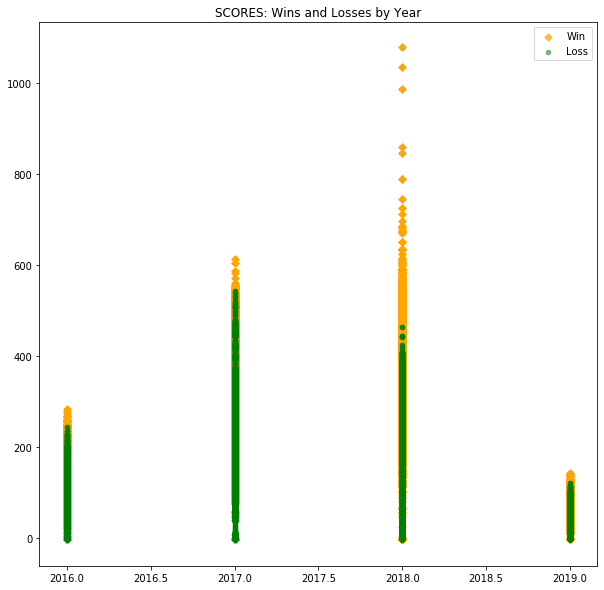

In [33]:
fig = plt.figure()
plt.title('SCORES: Wins and Losses by Year')
plt.scatter(x = team_scores_df[team_scores_df.win == 1]['year'], y= team_scores_df[team_scores_df.win == 1]['score'],s =25,
            c= 'orange',alpha = 0.7, marker='D', label = 'Win')
plt.scatter(x = team_scores_df[team_scores_df.win == 0]['year'], y= team_scores_df[team_scores_df.win == 0]['score'],s =20,
            c= 'Green',alpha = 0.5, marker='o', label = 'Loss')

plt.legend()
plt.show()

**Observation:**  
The above scatter plot illistrates why it is important to standarize the data. The range of values for each year is different since the game changes every year.   

In [34]:
# what is the means score by round for the winning and loosing team?  win = 1
team_scores_df.groupby(['win','g_rnd']).score_std.aggregate([np.mean, np.std,max,min])

mean       std       max       min
win g_rnd                                        
0   Final -0.523931  0.862055  2.646626 -4.190939
    QtrF  -0.531136  0.816808  2.778677 -3.556188
    Qual  -0.526487  0.842320  3.522577 -2.867095
    SemiF -0.527839  0.847662  3.022694 -3.786124
1   Final  0.523931  0.841081  3.338834 -3.402509
    QtrF   0.531136  0.876639  7.083561 -3.500971
    Qual   0.526487  0.857966  6.889350 -2.867095
    SemiF  0.527839  0.850895  4.083247 -3.295961

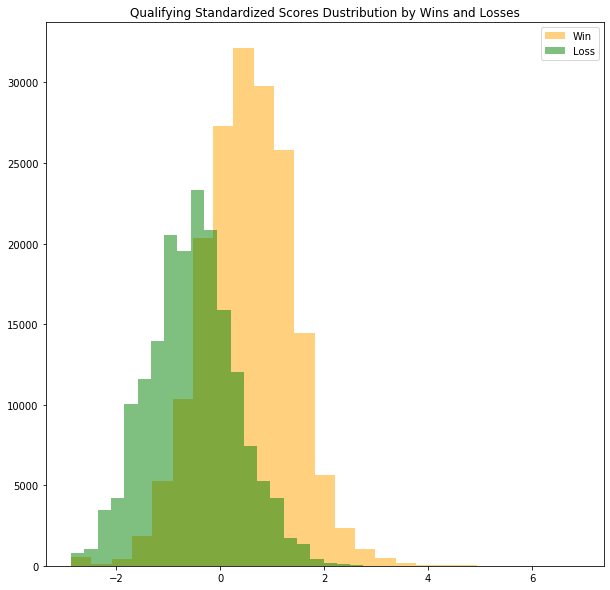

In [35]:
plt.hist(team_scores_df[(team_scores_df.win == 1) & (team_scores_df.g_rnd == 'Qual')]['score_std'],bins =25,
         facecolor = 'orange', alpha = 0.5,label = 'Win')
plt.hist(team_scores_df[(team_scores_df.win == 0) & (team_scores_df.g_rnd == 'Qual')]['score_std'],bins =25,
         facecolor = 'Green',alpha = 0.5, label = 'Loss')
plt.title('Qualifying Standardized Scores Dustribution by Wins and Losses')
plt.legend()
plt.show()

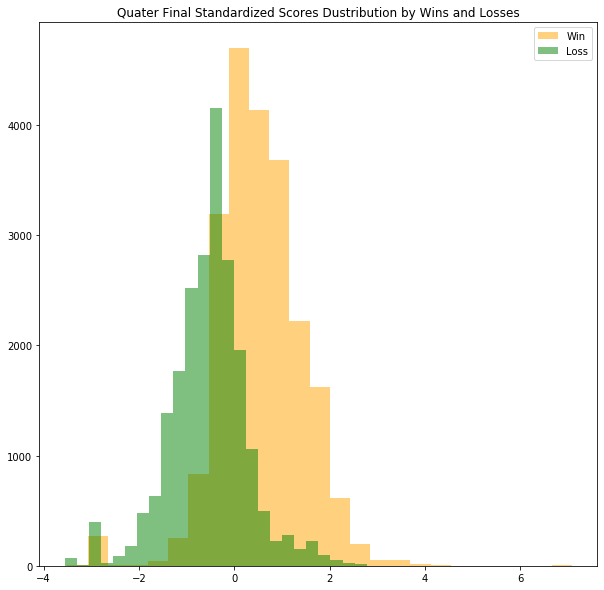

In [36]:
plt.hist(team_scores_df[(team_scores_df.win == 1) & (team_scores_df.g_rnd == 'QtrF')]['score_std'],bins =25,
         facecolor = 'orange', alpha = 0.5,label = 'Win')
plt.hist(team_scores_df[(team_scores_df.win == 0) & (team_scores_df.g_rnd == 'QtrF')]['score_std'],bins =25,
         facecolor = 'Green',alpha = 0.5, label = 'Loss')
plt.title('Quater Final Standardized Scores Dustribution by Wins and Losses')
plt.legend()
plt.show()

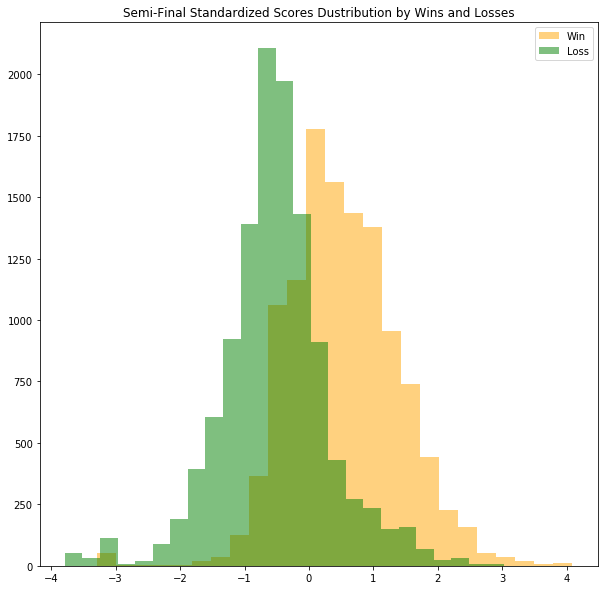

In [37]:
plt.hist(team_scores_df[(team_scores_df.win == 1) & (team_scores_df.g_rnd == 'SemiF')]['score_std'],bins =25,
         facecolor = 'orange', alpha = 0.5,label = 'Win')
plt.hist(team_scores_df[(team_scores_df.win == 0) & (team_scores_df.g_rnd == 'SemiF')]['score_std'],bins =25,
         facecolor = 'Green',alpha = 0.5, label = 'Loss')
plt.title('Semi-Final Standardized Scores Dustribution by Wins and Losses')
plt.legend()
plt.show()

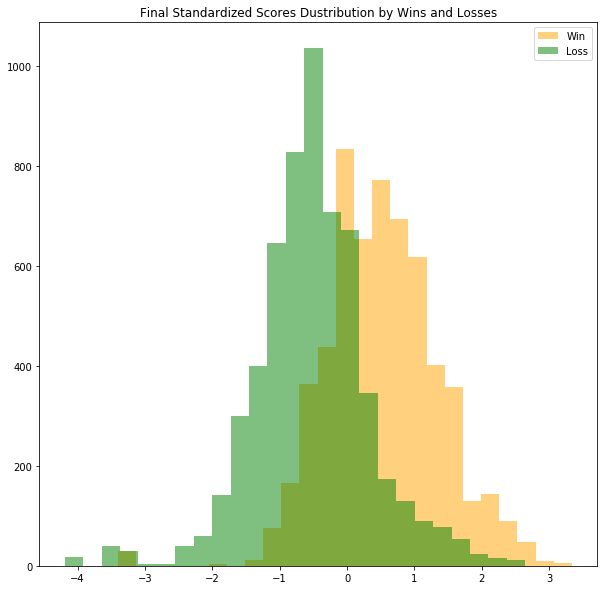

In [38]:
plt.hist(team_scores_df[(team_scores_df.win == 1) & (team_scores_df.g_rnd == 'Final')]['score_std'],bins =25,
         facecolor = 'orange', alpha = 0.5,label = 'Win')
plt.hist(team_scores_df[(team_scores_df.win == 0) & (team_scores_df.g_rnd == 'Final')]['score_std'],bins =25,
         facecolor = 'Green',alpha = 0.5, label = 'Loss')
plt.title('Final Standardized Scores Dustribution by Wins and Losses')
plt.legend()
plt.show()

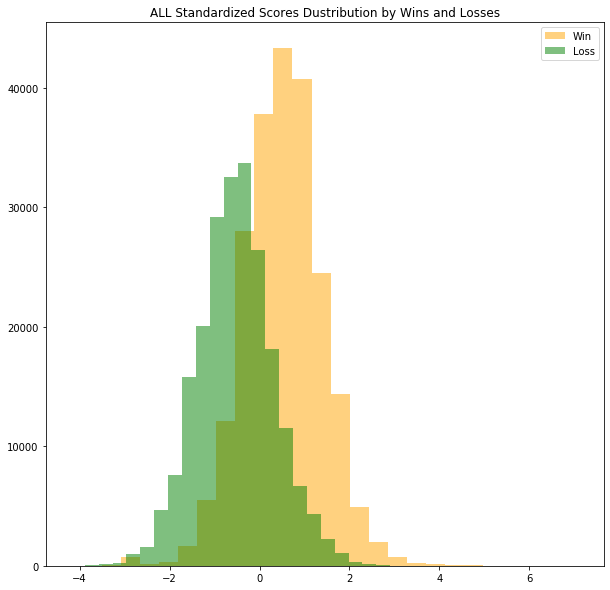

In [39]:
plt.hist(team_scores_df[team_scores_df.win == 1]['score_std'],bins =25,
         facecolor = 'orange', alpha = 0.5,label = 'Win')
plt.hist(team_scores_df[team_scores_df.win == 0]['score_std'],bins =25,
         facecolor = 'Green',alpha = 0.5, label = 'Loss')
plt.title('ALL Standardized Scores Dustribution by Wins and Losses')
plt.legend()
plt.show()

**Observation:**  
while reviewing the distributions the first is tht the distribution are normal.  this is a good thing sing it will allow me to make assiption when ai start appling my analysis method.  The next item is looking  the floor of the data, as the round get closer to the final matches we see that the base of the ditribution spreads indicating that difference between a winning and loosing score is growing the other observation is the overlap between winning and loosing. this overlap indicates to me that that any score in this region could eith be a win or loss, without certainty. the score that are outside the over lap have more certainty of match outcome.  

In [40]:
team_scores_df[team_scores_df['team_number'] == 'frc2996']

,team_number,year,regional,g_rnd,match,score,win,score_std
3113,frc2996,2016,azfl,QtrF,1,38.0,0,-2.011234
3119,frc2996,2016,azfl,QtrF,2,99.0,0,-0.489439
3200,frc2996,2016,azfl,Qual,16,79.0,0,-0.003554
3266,frc2996,2016,azfl,Qual,26,92.0,0,0.450305
3298,frc2996,2016,azfl,Qual,30,77.0,1,-0.073378
...,...,...,...,...,...,...,...,...
405013,frc2996,2019,okok,Qual,46,62.0,1,0.511327
405085,frc2996,2019,okok,Qual,57,60.0,1,0.405278
405167,frc2996,2019,okok,Qual,69,62.0,1,0.511327
405240,frc2996,2019,okok,Qual,80,76.0,1,1.253671


**Note:**  
The above table is a review of my team's results. there is not an observation here yet.

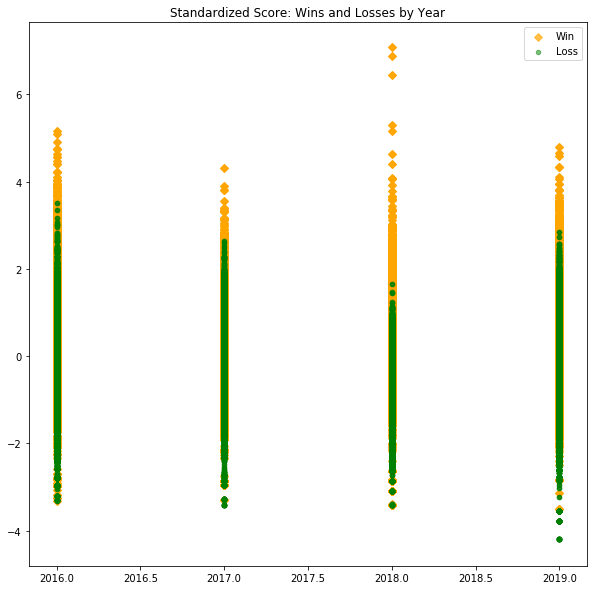

In [41]:
fig = plt.figure()
plt.title('Standardized Score: Wins and Losses by Year')
plt.scatter(x = team_scores_df[team_scores_df.win == 1]['year'], y= team_scores_df[team_scores_df.win == 1]['score_std'],s =30,
            c= 'orange',alpha = 0.7, marker='D', label = 'Win')
plt.scatter(x = team_scores_df[team_scores_df.win == 0]['year'], y= team_scores_df[team_scores_df.win == 0]['score_std'],s =20,
            c= 'Green',alpha = 0.5, marker='o', label = 'Loss')

plt.legend()
plt.show()

**Notes:**  
the above scatter plot is a little out of place but it does illistrate how the team score can be compared one the scores have been standardized.  

_To be done:_    
determine what is the minimum standardized score that is needed to win in each of the rounds?  
can we determine what team consistanly perform better?  

### Are awards important?

There is a small controversy wether the awards won by a team matter to the performance of the robot.  I would like to see if there is a relationship to the number of wins a team has in robot competition and awards won for the operations of the team.  

In [42]:
team_sum = pd.DataFrame({'wins': team_scores_df.groupby('team_number')['win'].sum()})
team_sum.head(5)

,wins
team_number,
frc,5
frc0,0
frc1,49
frc100,55
frc1002,128


In [43]:
team_sum['awards'] =  awards_df['team_number'].value_counts()
team_sum.head(5)

,wins,awards
team_number,,
frc,5,NaN
frc0,0,NaN
frc1,49,6.0
frc100,55,4.0
frc1002,128,14.0


Text(0.5, 0, 'team')

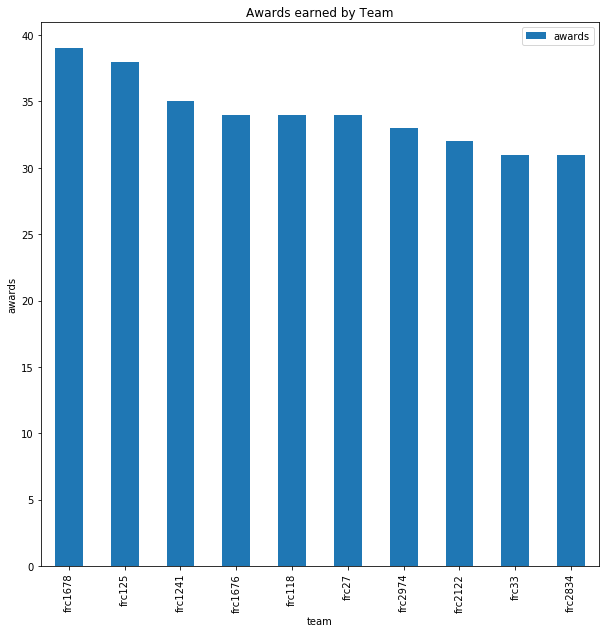

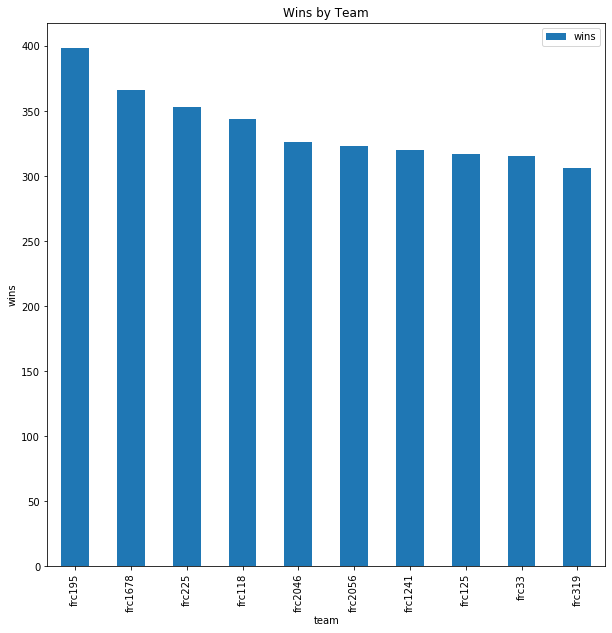

In [44]:
team_sum.reset_index().sort_values('awards',ascending = False).head(10).plot('team_number','awards',kind = 'bar',title = 'Awards earned by Team')
plt.ylabel('awards')
plt.xlabel('team')
team_sum.reset_index().sort_values('wins',ascending = False).head(10).plot('team_number','wins',kind = 'bar',title = 'Wins by Team')
plt.ylabel('wins')
plt.xlabel('team')

In [45]:
team_sum.sort_values('wins',ascending = False).head(20)

,wins,awards
team_number,,
frc195,398,27.0
frc1678,366,39.0
frc225,353,24.0
frc118,344,34.0
frc2046,326,27.0
frc2056,323,29.0
frc1241,320,35.0
frc125,317,38.0
frc33,315,31.0


In [46]:
team_sum.sort_values('wins',ascending = False).tail(20)

,wins,awards
team_number,,
frc7601,1,NaN
frc3508B,1,NaN
frc186,1,NaN
frc5566,1,NaN
frc9068,1,NaN
frc7215,1,NaN
frc1389B,1,NaN
frc540B,1,NaN
frc7467,1,NaN


In [47]:
team_sum.sort_values('wins',ascending = False).sample(20)

,wins,awards
team_number,,
frc9075,1,NaN
frc5612,63,1.0
frc6443,88,10.0
frc6863,14,3.0
frc7021,45,6.0
frc5621,11,NaN
frc7596,1,NaN
frc5549,59,2.0
frc5101,10,1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


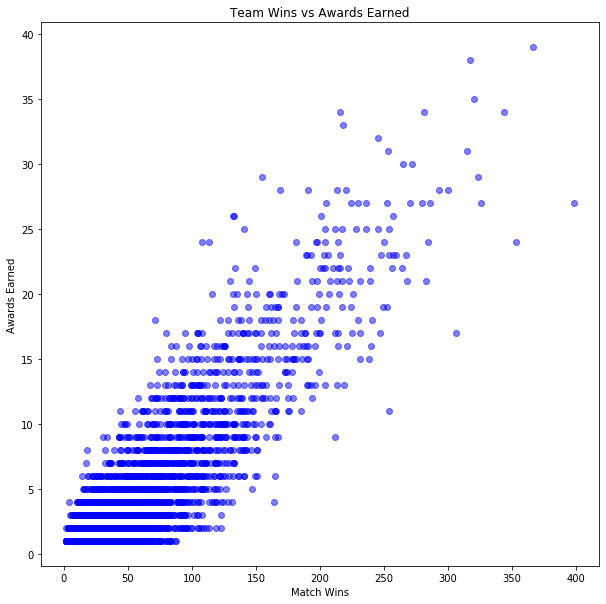

In [48]:
plt.scatter(team_sum.wins,team_sum.awards,
         c = 'B', alpha = 0.5)

plt.title('Team Wins vs Awards Earned')
plt.ylabel('Awards Earned')
plt.xlabel('Match Wins')
plt.show()

**Observation:**  
The teams that win more matches are the team that win more awards. This could be an indication of the quality of processes and team work within a team.  

###  TPOT Classification
 I do not have the computing resources to use the TPOT auto ML on my system.  I am leaving this code here for reference and if I have time I will work on using it in another environments.  

this code is reference in the TPOT documentation and here:  
https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/  
https://epistasislab.github.io/tpot/using/  


### Regression and Classification


In [49]:
# Additional imports
# these import should get move to the top or placed in the right place whe nt the code is operationalized  

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**convert the categorical text data to numerical equivalent**  

In [50]:
le = preprocessing.LabelEncoder()

#dataX_train.MSZoning = le.fit_transform(list(data["MSZoning"]))

team_scores_df['regional_numcode'] = le.fit_transform(list(team_scores_df.regional))
team_scores_df['g_rnd_numcode'] = le.fit_transform(list(team_scores_df.g_rnd))
team_scores_df.head(2)

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode
0,frc2013,2016,abca,Final,1,157.0,1,0.498701,0,0
1,frc4334,2016,abca,Final,1,157.0,1,0.498701,0,0


#### Scikit-Learn Understand  
This block of code was used to determine how to use the logistical regresstion module from  Scikit-learn  

In [51]:
# Drop the win column from the features data so that the desired outcome is not and input to the model
# Drop the score column from the feature because it is a un-normalized version of the score_std column and would be reduntant
# Drop Team_number as feature
# Drop regional and g_rond because they have been numberically encoded in columns regional_numcode and g_rnd_numcode

features = team_scores_df.drop(['team_number','win','score','regional' ,'g_rnd'], axis=1)
#features = team_scores_df.reset_index()[['team_number','score_std']]
train_X, test_X, train_y, test_y = train_test_split(features, team_scores_df['win'], test_size = 0.2, random_state=25)
features.head()

,year,match,score_std,regional_numcode,g_rnd_numcode
0,2016,1,0.498701,0,0
1,2016,1,0.498701,0,0
2,2016,1,0.498701,0,0
3,2016,1,-0.465507,0,0
4,2016,1,-0.465507,0,0


In [52]:
lr = LogisticRegression()
results = lr.fit(train_X,train_y)

In [53]:
train_X['pred_y'] = results.predict(train_X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
train_X.head(4)


,year,match,score_std,regional_numcode,g_rnd_numcode,pred_y
315281,2018,33,1.089355,306,2,1
405712,2019,50,0.405278,245,2,1
142428,2017,2,-0.836742,147,0,0
322509,2018,64,-0.169916,331,2,0


In [55]:
score = results.score(test_X, test_y)
score

0.7486204359422423

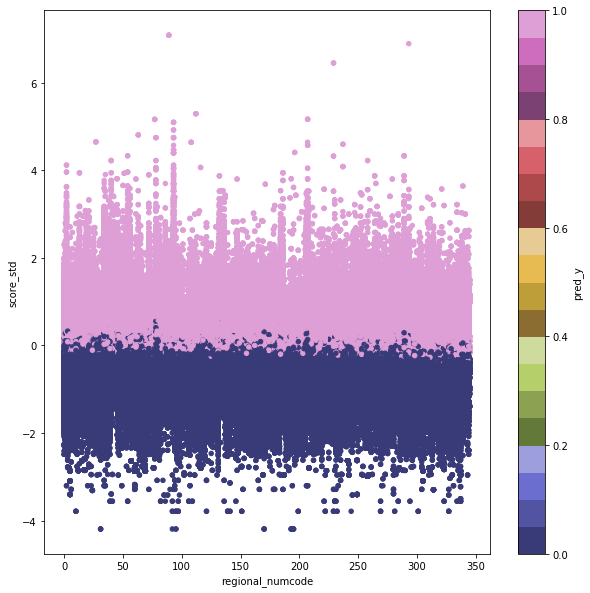

In [56]:
train_X.plot.scatter('regional_numcode','score_std', c = 'pred_y',colormap = 'tab20b',
                     sharex=False,colorbar = True)

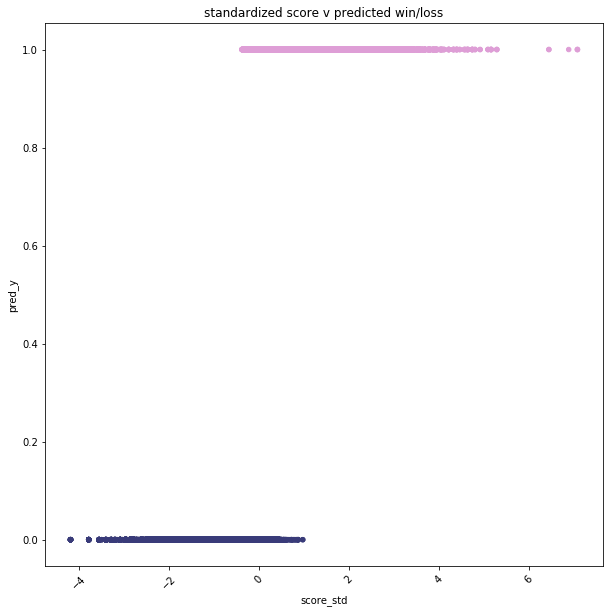

In [57]:
figsize=(6, 8)
train_X.plot.scatter('score_std','pred_y', c = 'pred_y',
                     colormap = 'tab20b',sharex=False,rot=45,colorbar = False,
                     title = 'standardized score v predicted win/loss',)


**determine the probability of winning**

In [58]:
prob_win = results.predict_proba(test_X)
prob_win

array([[0.43507568, 0.56492432],
       [0.46744456, 0.53255544],
       [0.10744284, 0.89255716],
       ...,
       [0.82948082, 0.17051918],
       [0.58852286, 0.41147714],
       [0.93264288, 0.06735712]])

#### End of Block
### Logistical Regresstion for probabilities and evaluation

In [59]:
#convert the categorical text data to numerical equivalent

le = preprocessing.LabelEncoder()

#dataX_train.MSZoning = le.fit_transform(list(data["MSZoning"]))

team_scores_df['regional_numcode'] = le.fit_transform(list(team_scores_df.regional))
team_scores_df['g_rnd_numcode'] = le.fit_transform(list(team_scores_df.g_rnd))
team_scores_df.head(2)

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode
0,frc2013,2016,abca,Final,1,157.0,1,0.498701,0,0
1,frc4334,2016,abca,Final,1,157.0,1,0.498701,0,0


**Note:**  
when i calulated the probability to win i use only the qual round because that will be the data that is used to make an alliance team selection from. the other rounds are not generated from the random paring of teams.  

In [60]:
# select only the row that are have a g_rnd value equal to 'Qual' and use only the following
# Columns for features 'year','score_std','regional_numcode','g_rnd_numcode' to predict on.

team_scores_df[['year','score_std','regional_numcode','g_rnd_numcode']][team_scores_df.g_rnd == 'Qual']

,year,score_std,regional_numcode,g_rnd_numcode
66,2016,-0.422500,0,2
67,2016,-0.422500,0,2
68,2016,-0.422500,0,2
69,2016,2.300651,0,2
70,2016,2.300651,0,2
...,...,...,...,...
434881,2019,0.511327,339,2
434882,2019,0.511327,339,2
434883,2019,1.253671,339,2
434884,2019,1.253671,339,2


In [61]:
# Create the logistical regression model

lr = LogisticRegression()
results = lr.fit(team_scores_df[['year','score_std','regional_numcode','g_rnd_numcode']][team_scores_df.g_rnd == 'Qual']
                 ,team_scores_df['win'][team_scores_df.g_rnd == 'Qual'])

In [62]:
results

LogisticRegression()

In [63]:
# save the model for future use
import pickle

pickle.dump(results, open('scout_model.sav','wb'))

#to load the model at a latter date use the following
# saved_model = pickle.load(open(scout_model.sav,'rb'))

In [64]:
# Calculate the probability of loosing and winning  

probs = results.predict_proba(team_scores_df[['year','score_std','regional_numcode','g_rnd_numcode']])
team_scores_df['prob_loss']= probs[:,0]
team_scores_df['prob_win']= probs[:,1]
team_scores_df.sample(7)

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode,prob_loss,prob_win
168282,frc293,2017,njtab,Qual,61,258.0,1,0.481844,222,2,0.320599,0.679401
339559,frc972,2019,casf,Qual,77,42.0,0,-0.549164,37,2,0.711736,0.288264
313392,frc624,2018,txel,Qual,44,462.0,1,1.622476,300,2,0.077031,0.922969
90857,frc4513,2016,warr,Qual,14,46.0,0,-1.155656,333,2,0.826792,0.173208
365624,frc6557,2019,mial2,Qual,14,43.0,0,-0.496139,123,2,0.681225,0.318775
142108,frc1506,2017,mike2,Qual,37,305.0,1,1.089566,146,2,0.170389,0.829611
356133,frc4103,2019,inmis,Qual,15,74.0,1,1.147622,88,2,0.164811,0.835189


## Builds a data frame to act as a regional event
Create a mock regional to build the code for the recomender. This set of data will only have the quallification rounds in it. 
this code can be use to analyze a regional event.  

#TODO create code to read in live regional data and pre process the dat to the correct format

In [65]:
#qual rounds numcode = 2

mock_reg = team_scores_df[(team_scores_df.regional == 'okok') & (team_scores_df.g_rnd == 'Qual') & (team_scores_df.year == 2019)]
#Drop the columns that where preprocess to build to model.
mock_reg = mock_reg.drop(['score_std','regional_numcode','g_rnd_numcode','prob_loss','prob_win'], axis = 1)
mock_reg

,team_number,year,regional,g_rnd,match,score,win
404772,frc2795,2019,okok,Qual,1,14.0,0
404773,frc2773,2019,okok,Qual,1,14.0,0
404774,frc7464,2019,okok,Qual,1,14.0,0
404775,frc31,2019,okok,Qual,1,23.0,1
404776,frc6464,2019,okok,Qual,1,23.0,1
...,...,...,...,...,...,...,...
405325,frc5930,2019,okok,Qual,93,38.0,0
405326,frc6800,2019,okok,Qual,93,38.0,0
405327,frc2461,2019,okok,Qual,93,53.0,1
405328,frc3593,2019,okok,Qual,93,53.0,1


In [66]:
from sklearn.preprocessing import scale

mock_reg['score_std'] = scale(mock_reg.score)


In [67]:
# Add in the numcode columns to use the model and calculate the probabilities
mock_reg['regional_numcode'] = 0  # enter a dummy value to be used by the regional (need to evaluate this as a feature)
mock_reg['g_rnd_numcode'] = 2 # qualification round = 2
mock_reg.sample(3)

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode
405238,frc2986,2019,okok,Qual,8,28.0,0,-1.209089,0,2
405268,frc2165,2019,okok,Qual,84,54.0,1,0.710529,0,2
405028,frc5730,2019,okok,Qual,48,49.0,1,0.341371,0,2


In [68]:
# Calculate the probability of loosing and winning  

mock_probs = results.predict_proba(mock_reg[['year','score_std','regional_numcode','g_rnd_numcode']])
mock_reg['prob_loss']= mock_probs[:,0]
mock_reg['prob_win']= mock_probs[:,1]
mock_reg.sample(7)

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode,prob_loss,prob_win
404788,frc2395,2019,okok,Qual,11,26.0,0,-1.356752,0,2,0.892476,0.107524
404819,frc4522,2019,okok,Qual,16,45.0,1,0.046045,0,2,0.515013,0.484987
404843,frc2341,2019,okok,Qual,2,50.0,0,0.415203,0,2,0.382007,0.617993
405170,frc1561,2019,okok,Qual,7,55.0,1,0.784360,0,2,0.264610,0.735390
404877,frc5578,2019,okok,Qual,25,27.0,1,-1.282921,0,2,0.881641,0.118359
404773,frc2773,2019,okok,Qual,1,14.0,0,-2.242730,0,2,0.968168,0.031832
405242,frc2341,2019,okok,Qual,80,76.0,1,2.334821,0,2,0.035750,0.964250


In [69]:
mock_reg[mock_reg['team_number'] == 'frc2996']  #TODO change this to my_team variable and verify code

,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode,prob_loss,prob_win
404846,frc2996,2019,okok,Qual,20,41.0,0,-0.249280,0,2,0.620803,0.379197
404882,frc2996,2019,okok,Qual,26,37.0,1,-0.544606,0,2,0.716231,0.283769
404928,frc2996,2019,okok,Qual,33,47.0,1,0.193708,0,2,0.460986,0.539014
404975,frc2996,2019,okok,Qual,4,68.0,1,1.744169,0,2,0.080986,0.919014
405013,frc2996,2019,okok,Qual,46,62.0,1,1.301180,0,2,0.144341,0.855659
405085,frc2996,2019,okok,Qual,57,60.0,1,1.153517,0,2,0.173180,0.826820
405167,frc2996,2019,okok,Qual,69,62.0,1,1.301180,0,2,0.144341,0.855659
405240,frc2996,2019,okok,Qual,80,76.0,1,2.334821,0,2,0.035750,0.964250
405285,frc2996,2019,okok,Qual,87,58.0,1,1.005854,0,2,0.206392,0.793608


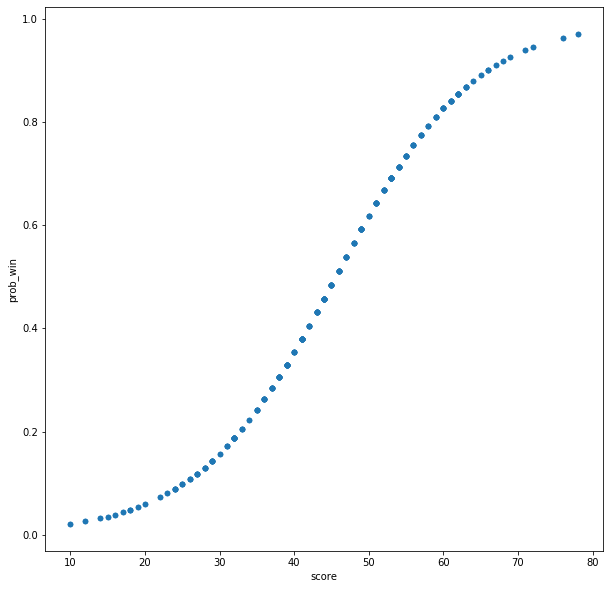

In [70]:
mock_reg.plot('score', 'prob_win', kind = 'scatter')

#refference:
#https://financetrain.com/multivariate-linear-regression-in-python-with-scikit-learn-library/


**Observation:**  
in the above plot the first thing i noticed what the s-curve to the plot. this is a shape of the logistical regression.  the next thing i observed what at what score did probability of winning equae to. If you want a 60% probability of winning the alliance will have to score 50 points.  

In [71]:
mock_ranking = mock_reg.groupby(['team_number'])['score','prob_win'].aggregate([np.mean, np.std,max,min])
mock_ranking

score                         prob_win                      \
                  mean        std   max   min      mean       std       max   
team_number                                                                   
frc1209      40.888889  12.702799  52.0  16.0  0.430303  0.234209  0.667629   
frc1410      48.888889  13.355190  63.0  23.0  0.580167  0.281113  0.868518   
frc1561      51.222222   9.337797  63.0  38.0  0.625184  0.214764  0.868518   
frc1619      62.333333   8.351647  78.0  52.0  0.831973  0.101244  0.971006   
frc1750      38.888889   6.450667  48.0  27.0  0.343232  0.137979  0.565765   
...                ...        ...   ...   ...       ...       ...       ...   
frc6900      34.444444  13.739643  60.0  10.0  0.285055  0.247460  0.826820   
frc7464      42.555556  14.081114  57.0  14.0  0.468488  0.271260  0.775318   
frc7473      39.222222  11.893042  54.0  26.0  0.374466  0.263537  0.713802   
frc7744      44.777778  11.659522  61.0  29.0  0.488209  0.265462  0.841772   
frc932       48.555556  10.666667  66.0  29.0  0.569885  0.232795  0.901374   

                       
                  min  
team_number            
frc1209      0.039222  
frc1410      0.080103  
frc1561      0.306269  
frc1619      0.667629  
frc1750      0.118359  
...               ...  
frc6900      0.020881  
frc7464      0.031832  
frc7473      0.107524  
frc7744      0.142875  
frc932       0.142875  

[62 rows x 8 columns]

**Obsdervation**  
The above table is a summary of how the teams did in the quallifying rounds. 

In [72]:
mock_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, frc1209 to frc932
Data columns (total 8 columns):
(score, mean)       62 non-null float64
(score, std)        62 non-null float64
(score, max)        62 non-null float64
(score, min)        62 non-null float64
(prob_win, mean)    62 non-null float64
(prob_win, std)     62 non-null float64
(prob_win, max)     62 non-null float64
(prob_win, min)     62 non-null float64
dtypes: float64(8)
memory usage: 4.4+ KB


In [73]:
#Rename the columns to make them easier to adress and read

mock_ranking.columns = [x[0]+'_'+x[1] for x in mock_ranking.columns]
mock_ranking.rename(columns = {'score_std':'score_stdev','prob_win_std':'prob_win_stdev'}, inplace=True)
mock_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, frc1209 to frc932
Data columns (total 8 columns):
score_mean        62 non-null float64
score_stdev       62 non-null float64
score_max         62 non-null float64
score_min         62 non-null float64
prob_win_mean     62 non-null float64
prob_win_stdev    62 non-null float64
prob_win_max      62 non-null float64
prob_win_min      62 non-null float64
dtypes: float64(8)
memory usage: 4.4+ KB


In [74]:
#sort the data frame from highest mean score to the lowest
mock_ranking.sort_values('score_mean',ascending = False, inplace =True )

In [75]:
print('score-\nmean: ', mock_ranking['score_mean'].mean(),
'\nmin:  ',mock_ranking['score_mean'].min(),
'\nmax:  ',mock_ranking['score_mean'].max())

score-
mean:  44.3763440860215 
min:   32.666666666666664 
max:   62.333333333333336


#### Calculate local maximum

calculate the maximum Likelihood of a 3 variable (teams) scoring the maximum amounts of points.  
(myTeam + team2 + team3)/3  = max posible score.  This should generate a list of teams that could be chosen in rank order.  


http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode63.html  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html  

here is a reference to how it is calulated  
https://www.khanacademy.org/math/ap-calculus-ab/ab-diff-analytical-applications-new/ab-5-4/a/relative-minima-and-maxima-review#:~:text=Find%20the%20first%20derivative%20of,relative%20maxima%20at%20that%20point.  



https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030
https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python


In [76]:
mock_ranking.head(3)

,score_mean,score_stdev,score_max,score_min,prob_win_mean,prob_win_stdev,prob_win_max,prob_win_min
team_number,,,,,,,,
frc1619,62.333333,8.351647,78.0,52.0,0.831973,0.101244,0.971006,0.667629
frc2996,56.777778,12.735558,76.0,37.0,0.712999,0.247906,0.964250,0.283769
frc4005,56.222222,9.175753,69.0,39.0,0.728769,0.193177,0.926712,0.329731


In [77]:
mock_ranking.to_csv('regional_team_ranking.csv', sep = '\t')

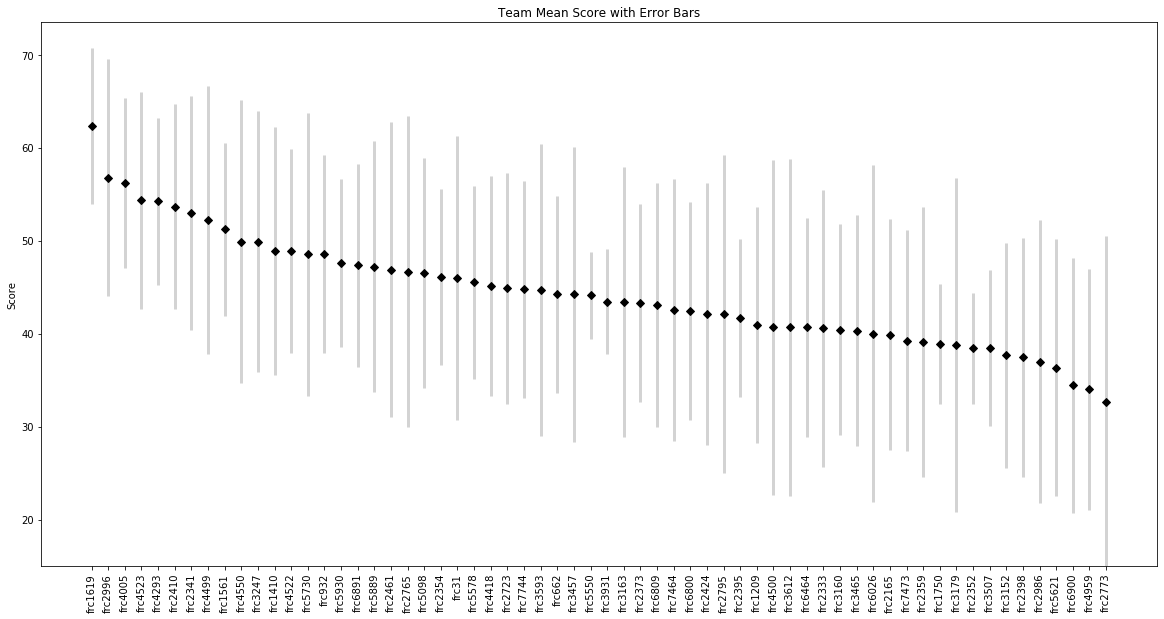

In [78]:
plt.figure(figsize=(20,10))
plt.errorbar(mock_ranking.index,mock_ranking.score_mean,mock_ranking.score_stdev, fmt='D',color='k',
             ecolor='lightgray', elinewidth=3, capsize=0)

plt.xticks(rotation = 90)
plt.ylim(bottom = 15)
plt.title('Team Mean Score with Error Bars')
plt.ylabel('Score')
plt.savefig('TeamMeanScore.jpg')
plt.show()

**Observation:**  
the above chart has a lot of information. The chart plots the mean score and the errorbar (standard Deviation) of each teams scoring during the qualification rounds. this is helpful information when evaluating a team. the hier the score is andication of how well the team performed. But, because the score is really a score for the allaince the error bars indicate how much the other teams affected the the teams mean score.  if ther are large errorbars this would indicate that the match for that team were diverse and alliance member wher not all of the same quality. if the error baras are tight then those allaince were compriable and the quality of the team were simular.  So if the choice between two team the one with a smaller error bar would indicat a more stable and better team.  


## Build the recomendations
### First Pass
in this pass calulate the combined mean_score and prob_win for my_team and each of the other teams in the regional. The resulting list is ordered by the score_mean then the prob_win columns.  

In [79]:
#mock_ranking = mock_ranking.reset_index() #used for testing
#mock_ranking.set_index('team_number', inplace = True) #used for testing

# Create a blank datafram that will be used to store the list of recomendations.
pairings = pd.DataFrame(columns =['team_number1','team_number2','team_number3','score_mean','prob_win'])
my_team = 'frc2996' #in the final deployed version make this an input paramenter with a default to 'frc2996'

my_team_score = mock_ranking.loc[my_team,'score_mean']
my_team_prob_win = mock_ranking.loc[my_team,'prob_win_mean']

for i,d in mock_ranking.iterrows():
    if i == my_team: continue
    score = (my_team_score + mock_ranking.loc[i,'score_mean'])/2
    prob_win = (my_team_prob_win + mock_ranking.loc[i,'prob_win_mean'])/2
    new_row = {'team_number1':my_team,'team_number2':i, 'score_mean':score,'prob_win':prob_win}
    pairings = pairings.append(new_row,ignore_index=True)
pairings.sort_values('score_mean',ascending = False, inplace =True )

### Second Pass  
In the second pass calculate the highest score_mean and prob_win for each of the pair already calculated.  If the team is already a member of the alliance and it probability of win is not equal to or higher than what has already been calculated it is excluded from the evaluation.  the final score_mean and prob_win are recalulated for all three team in the alliance.  The resulting list is ordered by the score_mean then the prob_win columns.  

In [80]:
for c,r in pairings.iterrows():
    teams = [pairings.loc[c, 'team_number1'], pairings.loc[c, 'team_number2']]
    unavailable = []
    for i,d in mock_ranking.iterrows():
        if i in teams: continue
        if i in unavailable: continue
        if mock_ranking.loc[i,'prob_win_mean'] < pairings.loc[c,'prob_win']:continue
        pairings.loc[c,'team_number3'] = i
        pairings.loc[c,'score_mean'] = (mock_ranking.loc[teams[0],'score_mean']+mock_ranking.loc[teams[1],'score_mean'] + mock_ranking.loc[i,'score_mean'])/3
        pairings.loc[c,'prob_win'] = (mock_ranking.loc[teams[0],'prob_win_mean']+mock_ranking.loc[teams[1],'prob_win_mean'] + mock_ranking.loc[i,'prob_win_mean'])/3
        unavailable.append(i)

### Recomendation list
Here is the final list of recomendations.  

In [81]:
pairings.sort_values(['score_mean','prob_win'],ascending = False, inplace =True )
pairings.to_csv('recomend.csv', sep='\t', encoding='utf-8' )
pairings

,team_number1,team_number2,team_number3,score_mean,prob_win
0,frc2996,frc1619,NaN,59.555556,0.772486
1,frc2996,frc4005,frc1619,58.444444,0.757914
2,frc2996,frc4523,frc1619,57.814815,0.738830
3,frc2996,frc4293,frc1619,57.777778,0.745030
4,frc2996,frc2410,frc1619,57.592593,0.737203
...,...,...,...,...,...
56,frc2996,frc2986,frc2461,46.888889,0.538956
57,frc2996,frc5621,frc2461,46.666667,0.533436
58,frc2996,frc6900,frc31,45.740741,0.507525
59,frc2996,frc4959,frc31,45.592593,0.509042


**Observation:**  
Recomendation 0 is a artifact of how the recomendations are made.  because team_number2 is the highest ranked team no other teams can equal or increase the alliance mean score, so no other teams are selected for that alliance. For evaluation of alliance alliance 0 should not be considered.

In [82]:
pairings.sample(20)

,team_number1,team_number2,team_number3,score_mean,prob_win
58,frc2996,frc6900,frc31,45.740741,0.507525
51,frc2996,frc3179,frc2461,47.481481,0.539561
12,frc2996,frc5730,frc4499,52.518519,0.634221
56,frc2996,frc2986,frc2461,46.888889,0.538956
29,frc2996,frc5550,frc4550,50.259259,0.594295
1,frc2996,frc4005,frc1619,58.444444,0.757914
44,frc2996,frc3160,frc5889,48.148148,0.556976
6,frc2996,frc4499,frc1619,57.111111,0.733859
5,frc2996,frc2341,frc1619,57.370370,0.735774
55,frc2996,frc2398,frc2461,47.037037,0.537839


**Create a clustering analysis of the paring in the recomendation**  
I am using the meanShift algorythm for determine the cluster in the data.  Meanshift is a variation of the K-mean cluster that does not require a know number of clusters.  This redueced the amount of coded needed for the exercise.  

In [83]:
from sklearn.cluster import MeanShift

pairings_copy = pd.DataFrame.copy(pairings) # create a copy to perforn the clustering on kept the original for latter analysis
pairings_copy['team_number1'] = le.fit_transform(list(pairings['team_number1']))
pairings_copy['team_number2'] = le.fit_transform(list(pairings['team_number2']))
pairings_copy['team_number3'] = le.fit_transform(list(pairings['team_number3']))


recomend_cluster = MeanShift().fit(pairings_copy)


In [84]:
labels = recomend_cluster.labels_


In [85]:
pairings['cluster_gp'] = np.nan
for i,c in pairings.iterrows():
    pairings.loc[i,'cluster_gp'] = labels[i]
pairings

,team_number1,team_number2,team_number3,score_mean,prob_win,cluster_gp
0,frc2996,frc1619,NaN,59.555556,0.772486,1.0
1,frc2996,frc4005,frc1619,58.444444,0.757914,0.0
2,frc2996,frc4523,frc1619,57.814815,0.738830,0.0
3,frc2996,frc4293,frc1619,57.777778,0.745030,0.0
4,frc2996,frc2410,frc1619,57.592593,0.737203,1.0
...,...,...,...,...,...,...
56,frc2996,frc2986,frc2461,46.888889,0.538956,1.0
57,frc2996,frc5621,frc2461,46.666667,0.533436,2.0
58,frc2996,frc6900,frc31,45.740741,0.507525,2.0
59,frc2996,frc4959,frc31,45.592593,0.509042,0.0


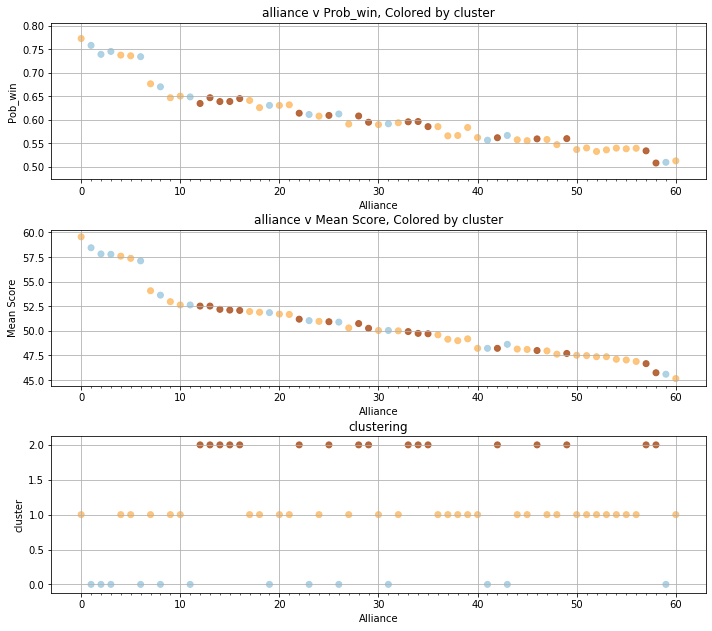

In [86]:
fig , ax = plt.subplots(3,1,'none')
#plt.tight_layout()

ax[0].scatter(pairings.index,pairings.prob_win,
         c = pairings.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[0].set_title('alliance v Prob_win, Colored by cluster')
ax[0].set_ylabel('Pob_win')
ax[0].set_xlabel('Alliance')
ax[0].set_xticks(ticks =pairings.index, minor = True)
ax[0].grid()
    
ax[1].scatter(pairings.index,pairings.score_mean,
                c = pairings.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[1].set_title('alliance v Mean Score, Colored by cluster')
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Alliance')
ax[1].set_xticks(ticks =pairings.index, minor = True)
ax[1].grid()

ax[2].scatter(pairings.index,pairings.cluster_gp,
         c = pairings.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[2].set_title('alliance v Cluster, Colored by cluster')
ax[2].set_ylabel('cluster')
ax[2].set_xlabel('Alliance')
ax[2].set_xticks(ticks =pairings.index, minor = True)
ax[2].grid()

plt.title('clustering')
#plt.ylabel('mean_score')
#plt.xlabel('alliance index number')
plt.tight_layout()
plt.subplots_adjust(top= 0.85)
plt.show()

**Observation:**  
the above three chart are interesting.  if there was some confict in getting an actual recomended allaince pairing because one of the prefered teams has bee selected the color group could be use to select a substitute team. The color groups identify team with simular characteristics.

In [87]:
mock_ranking_copy = pd.DataFrame.copy(mock_ranking) # create a copy to perforn the clustering on keept the original for latter analysis



ranking_cluster = MeanShift().fit(mock_ranking_copy)

In [88]:
labels = ranking_cluster.labels_

In [89]:
mock_ranking['cluster_gp'] = np.nan
for i in range(len(mock_ranking)):
    mock_ranking['cluster_gp'].iloc[i] = labels[i]
mock_ranking

,score_mean,score_stdev,score_max,score_min,prob_win_mean,prob_win_stdev,prob_win_max,prob_win_min,cluster_gp
team_number,,,,,,,,,
frc1619,62.333333,8.351647,78.0,52.0,0.831973,0.101244,0.971006,0.667629,1.0
frc2996,56.777778,12.735558,76.0,37.0,0.712999,0.247906,0.964250,0.283769,1.0
frc4005,56.222222,9.175753,69.0,39.0,0.728769,0.193177,0.926712,0.329731,1.0
frc4523,54.333333,11.715375,78.0,40.0,0.671518,0.215159,0.971006,0.354074,1.0
frc4293,54.222222,9.024658,65.0,39.0,0.690117,0.197585,0.891326,0.329731,1.0
...,...,...,...,...,...,...,...,...,...
frc2986,37.000000,15.247951,60.0,17.0,0.351408,0.293218,0.826820,0.043510,0.0
frc5621,36.333333,13.820275,53.0,18.0,0.334848,0.273502,0.691193,0.048243,0.0
frc6900,34.444444,13.739643,60.0,10.0,0.285055,0.247460,0.826820,0.020881,0.0


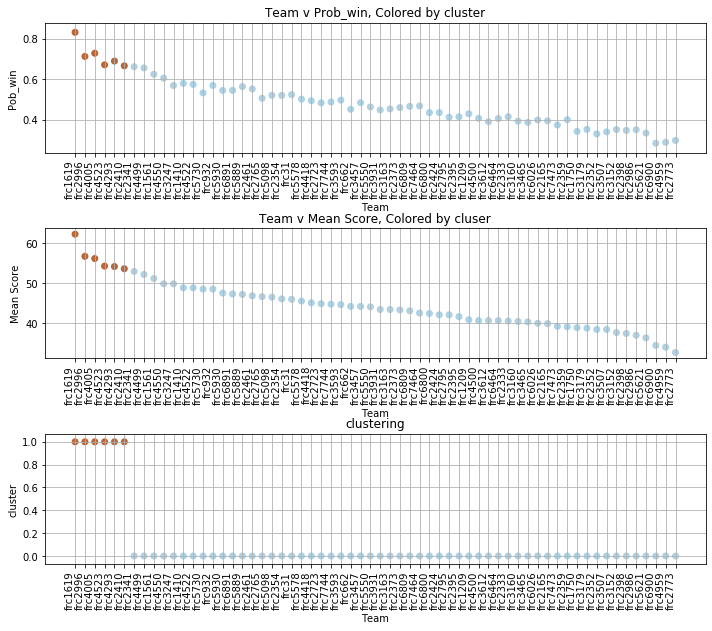

In [90]:
fig , ax = plt.subplots(3,1,'none')
#plt.tight_layout()

ax[0].scatter(mock_ranking.index,mock_ranking.prob_win_mean,
         c = mock_ranking.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[0].set_title('Team v Prob_win, Colored by cluster')
ax[0].set_ylabel('Pob_win')
ax[0].set_xlabel('Team')
ax[0].set_xticklabels(labels=mock_ranking.index , rotation=90, ha='right')
ax[0].grid()

ax[1].scatter(mock_ranking.index,mock_ranking.score_mean,
                c = mock_ranking.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[1].set_title('Team v Mean Score, Colored by cluser')
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Team')
ax[1].set_xticklabels(labels=mock_ranking.index , rotation=90, ha='right')
ax[1].grid()

ax[2].scatter(mock_ranking.index,mock_ranking.cluster_gp,
         c = mock_ranking.cluster_gp, alpha = 0.9, cmap = 'Paired')
ax[2].set_title('Team v Cluster, Colored by cluster')
ax[2].set_ylabel('cluster')
ax[2].set_xlabel('Team')
ax[2].set_xticklabels(labels=mock_ranking.index , rotation=90, ha='right')
ax[2].grid()

plt.title('clustering')
#plt.ylabel('mean_score')
#plt.xlabel('alliance index number')
plt.tight_layout()
plt.subplots_adjust(top= 0.85)
plt.show()

**Observation**  
for completeness i executed the meanShift on all of the teams to see if there wher groups identified. from these charts I do not see any value in using this method for alliance selection.  

## Build some validatation data

For the regional used retrieve the final round data and compare that with the recomendations.  

In [91]:
#qual rounds numcode = 2

mock_validate = team_scores_df[(team_scores_df.regional == 'okok') & (team_scores_df.g_rnd != 'Qual') & (team_scores_df.year == 2019)]
#Drop the columns that where preprocess to build to model.
#mock_validate = mock_validate.drop(['score_std','regional_numcode','g_rnd_numcode','prob_loss','prob_win'], axis = 1)
mock_validate.to_csv('finalists.csv', sep='\t', encoding='utf-8' )
mock_validate.head(12)


,team_number,year,regional,g_rnd,match,score,win,score_std,regional_numcode,g_rnd_numcode,prob_loss,prob_win
404694,frc4005,2019,okok,Final,1,69.0,1,-0.203092,244,0,0.558732,0.441268
404695,frc1619,2019,okok,Final,1,69.0,1,-0.203092,244,0,0.558732,0.441268
404696,frc6026,2019,okok,Final,1,69.0,1,-0.203092,244,0,0.558732,0.441268
404697,frc4499,2019,okok,Final,1,38.0,0,-1.994733,244,0,0.945945,0.054055
404698,frc1410,2019,okok,Final,1,38.0,0,-1.994733,244,0,0.945945,0.054055
404699,frc2461,2019,okok,Final,1,38.0,0,-1.994733,244,0,0.945945,0.054055
404700,frc4005,2019,okok,Final,2,66.0,0,-0.376476,244,0,0.620145,0.379855
404701,frc1619,2019,okok,Final,2,66.0,0,-0.376476,244,0,0.620145,0.379855
404702,frc6026,2019,okok,Final,2,66.0,0,-0.376476,244,0,0.620145,0.379855
404703,frc4499,2019,okok,Final,2,69.0,1,-0.203092,244,0,0.558732,0.441268


In [92]:
mock_validate.g_rnd.unique()

array(['Final', 'QtrF', 'SemiF'], dtype=object)

In [93]:
qual_teams = mock_validate[mock_validate.g_rnd == 'QtrF']['team_number'].unique()
print(qual_teams)

['frc4005' 'frc1619' 'frc6026' 'frc932' 'frc7744' 'frc1561' 'frc2341'
 'frc3247' 'frc2765' 'frc4550' 'frc2996' 'frc3179' 'frc4522' 'frc2410'
 'frc3612' 'frc5578' 'frc2354' 'frc4500' 'frc4293' 'frc4523' 'frc5730'
 'frc4499' 'frc1410' 'frc2461']


In [94]:
pairings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 6 columns):
team_number1    61 non-null object
team_number2    61 non-null object
team_number3    60 non-null object
score_mean      61 non-null float64
prob_win        61 non-null float64
cluster_gp      61 non-null float64
dtypes: float64(3), object(3)
memory usage: 5.8+ KB


In [95]:
pairings['finals'] = 'a'# create a column of object type
for i,r in pairings.iterrows():
    count = []
    if pairings.loc[i,'team_number1'] in qual_teams: count.append(pairings.loc[i,'team_number1'])
    if pairings.loc[i,'team_number2'] in qual_teams: count.append(pairings.loc[i,'team_number2'])
    if pairings.loc[i,'team_number3'] in qual_teams: count.append(pairings.loc[i,'team_number3'])
    pairings.at[i,'finals'] = count
print(qual_teams)
pairings.head(20)

['frc4005' 'frc1619' 'frc6026' 'frc932' 'frc7744' 'frc1561' 'frc2341'
 'frc3247' 'frc2765' 'frc4550' 'frc2996' 'frc3179' 'frc4522' 'frc2410'
 'frc3612' 'frc5578' 'frc2354' 'frc4500' 'frc4293' 'frc4523' 'frc5730'
 'frc4499' 'frc1410' 'frc2461']


,team_number1,team_number2,team_number3,score_mean,prob_win,cluster_gp,finals
0,frc2996,frc1619,NaN,59.555556,0.772486,1.0,"[frc2996, frc1619]"
1,frc2996,frc4005,frc1619,58.444444,0.757914,0.0,"[frc2996, frc4005, frc1619]"
2,frc2996,frc4523,frc1619,57.814815,0.738830,0.0,"[frc2996, frc4523, frc1619]"
3,frc2996,frc4293,frc1619,57.777778,0.745030,0.0,"[frc2996, frc4293, frc1619]"
4,frc2996,frc2410,frc1619,57.592593,0.737203,1.0,"[frc2996, frc2410, frc1619]"
5,frc2996,frc2341,frc1619,57.370370,0.735774,1.0,"[frc2996, frc2341, frc1619]"
6,frc2996,frc4499,frc1619,57.111111,0.733859,0.0,"[frc2996, frc4499, frc1619]"
7,frc2996,frc1561,frc4293,54.074074,0.676100,1.0,"[frc2996, frc1561, frc4293]"
8,frc2996,frc4550,frc4293,53.629630,0.669694,0.0,"[frc2996, frc4550, frc4293]"
9,frc2996,frc3247,frc4499,52.962963,0.646449,1.0,"[frc2996, frc3247, frc4499]"


In [96]:
pairings.tail(10)

,team_number1,team_number2,team_number3,score_mean,prob_win,cluster_gp,finals
51,frc2996,frc3179,frc2461,47.481481,0.539561,1.0,"[frc2996, frc3179, frc2461]"
53,frc2996,frc3507,frc2461,47.370370,0.535476,1.0,"[frc2996, frc2461]"
52,frc2996,frc2352,frc2461,47.370370,0.532126,1.0,"[frc2996, frc2461]"
54,frc2996,frc3152,frc2461,47.111111,0.539243,1.0,"[frc2996, frc2461]"
55,frc2996,frc2398,frc2461,47.037037,0.537839,1.0,"[frc2996, frc2461]"
56,frc2996,frc2986,frc2461,46.888889,0.538956,1.0,"[frc2996, frc2461]"
57,frc2996,frc5621,frc2461,46.666667,0.533436,2.0,"[frc2996, frc2461]"
58,frc2996,frc6900,frc31,45.740741,0.507525,2.0,[frc2996]
59,frc2996,frc4959,frc31,45.592593,0.509042,0.0,[frc2996]
60,frc2996,frc2773,frc31,45.148148,0.512119,1.0,[frc2996]


In [97]:
pairings.to_csv('validation.csv', sep='\t', encoding='utf-8' )

**Note**  
recall the quallifying round score for those teams that made it to the finals  

In [98]:
mock_ranking[mock_ranking.index.isin(qual_teams)]

,score_mean,score_stdev,score_max,score_min,prob_win_mean,prob_win_stdev,prob_win_max,prob_win_min,cluster_gp
team_number,,,,,,,,,
frc1619,62.333333,8.351647,78.0,52.0,0.831973,0.101244,0.971006,0.667629,1.0
frc2996,56.777778,12.735558,76.0,37.0,0.712999,0.247906,0.964250,0.283769,1.0
frc4005,56.222222,9.175753,69.0,39.0,0.728769,0.193177,0.926712,0.329731,1.0
frc4523,54.333333,11.715375,78.0,40.0,0.671518,0.215159,0.971006,0.354074,1.0
frc4293,54.222222,9.024658,65.0,39.0,0.690117,0.197585,0.891326,0.329731,1.0
frc2410,53.666667,11.011358,71.0,36.0,0.666635,0.229171,0.940121,0.262297,1.0
frc2341,53.000000,12.579746,76.0,27.0,0.662350,0.230892,0.964250,0.118359,0.0
frc4499,52.222222,14.394250,66.0,20.0,0.656605,0.275064,0.901374,0.059211,0.0
frc1561,51.222222,9.337797,63.0,38.0,0.625184,0.214764,0.868518,0.306269,0.0


In [99]:
mock_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 404694 to 405365
Data columns (total 12 columns):
team_number         114 non-null object
year                114 non-null int32
regional            114 non-null object
g_rnd               114 non-null object
match               114 non-null int32
score               114 non-null float64
win                 114 non-null int32
score_std           114 non-null float64
regional_numcode    114 non-null int64
g_rnd_numcode       114 non-null int64
prob_loss           114 non-null float64
prob_win            114 non-null float64
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 10.2+ KB


### Recreate alliances

Here is the recreated alliances with their quarter final score/record  

In [100]:
# reconstruct the alliance from the regional
alliance = []
team =[]
f = 0
d = 0
for x,y in mock_validate[(mock_validate.g_rnd == 'QtrF') & (mock_validate.match == 1)].iterrows():
    #print('Match: ',mock_validate)   
    if (f < 3):
        team.append(y.team_number)
        f +=1
        #print('a',team,f)
    else:
        alliance.append(team)
        f = 0
        team = []
        #print('b',team,f)
        team.append(y.team_number)
        f += 1
        d += 1
        #print('c',team,f)
alliance.append(team)  # write the last row to the list
alliance

[['frc4005', 'frc1619', 'frc6026'],
 ['frc932', 'frc7744', 'frc1561'],
 ['frc2341', 'frc3247', 'frc2765'],
 ['frc4550', 'frc2996', 'frc3179'],
 ['frc4522', 'frc2410', 'frc3612'],
 ['frc5578', 'frc2354', 'frc4500'],
 ['frc4293', 'frc4523', 'frc5730'],
 ['frc4499', 'frc1410', 'frc2461']]

In [101]:
for k in range(0,len(alliance)):
    print(k,alliance[k])
    score = mock_validate[(mock_validate.team_number == alliance[k][0]) & (mock_validate.g_rnd == 'QtrF')].score.values
    score = score.tolist()
    print(k,score)
    win = mock_validate[(mock_validate.team_number == alliance[k][0]) & (mock_validate.g_rnd == 'QtrF')].win.values
    win = win.tolist()
    alliance[k].append(score)
    alliance[k].append(win)

    #scores_df =scores_df.append(alliance,ignore_index=True)
Val_scores_df = pd.DataFrame(alliance, columns = ['team1','team2','team3','scores','record'])

0 ['frc4005', 'frc1619', 'frc6026']
0 [72.0, 68.0]
1 ['frc932', 'frc7744', 'frc1561']
1 [52.0, 52.0]
2 ['frc2341', 'frc3247', 'frc2765']
2 [89.0, 66.0, 72.0]
3 ['frc4550', 'frc2996', 'frc3179']
3 [60.0, 69.0, 59.0]
4 ['frc4522', 'frc2410', 'frc3612']
4 [57.0, 71.0]
5 ['frc5578', 'frc2354', 'frc4500']
5 [49.0, 50.0]
6 ['frc4293', 'frc4523', 'frc5730']
6 [48.0, 67.0, 62.0]
7 ['frc4499', 'frc1410', 'frc2461']
7 [70.0, 63.0, 71.0]


In [102]:
Val_scores_df

,team1,team2,team3,scores,record
0,frc4005,frc1619,frc6026,"[72.0, 68.0]","[1, 1]"
1,frc932,frc7744,frc1561,"[52.0, 52.0]","[0, 0]"
2,frc2341,frc3247,frc2765,"[89.0, 66.0, 72.0]","[1, 0, 1]"
3,frc4550,frc2996,frc3179,"[60.0, 69.0, 59.0]","[0, 1, 0]"
4,frc4522,frc2410,frc3612,"[57.0, 71.0]","[1, 1]"
5,frc5578,frc2354,frc4500,"[49.0, 50.0]","[0, 0]"
6,frc4293,frc4523,frc5730,"[48.0, 67.0, 62.0]","[0, 1, 0]"
7,frc4499,frc1410,frc2461,"[70.0, 63.0, 71.0]","[1, 0, 1]"


In [103]:
for i,r in Val_scores_df.iterrows():
    Val_scores_df.loc[i,'pred_mean_score'] = (mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team1']].score_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team2']].score_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team3']].score_mean.values)/3
    Val_scores_df.loc[i,'prob_win'] = (mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team1']].prob_win_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team2']].prob_win_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[i,'team3']].prob_win_mean.values)/3
    
Val_scores_df

,team1,team2,team3,scores,record,pred_mean_score,prob_win
0,frc4005,frc1619,frc6026,"[72.0, 68.0]","[1, 1]",52.851852,0.653410
1,frc932,frc7744,frc1561,"[52.0, 52.0]","[0, 0]",48.185185,0.561093
2,frc2341,frc3247,frc2765,"[89.0, 66.0, 72.0]","[1, 0, 1]",49.851852,0.579528
3,frc4550,frc2996,frc3179,"[60.0, 69.0, 59.0]","[0, 1, 0]",48.481481,0.557395
4,frc4522,frc2410,frc3612,"[57.0, 71.0]","[1, 1]",47.740741,0.544253
5,frc5578,frc2354,frc4500,"[49.0, 50.0]","[0, 0]",44.111111,0.477100
6,frc4293,frc4523,frc5730,"[48.0, 67.0, 62.0]","[0, 1, 0]",52.370370,0.631565
7,frc4499,frc1410,frc2461,"[70.0, 63.0, 71.0]","[1, 0, 1]",49.333333,0.596411


**Observation:**  
the above table is a recreation of what the recomender woudl have said about the actual alliance in the finals.  the scores reported are only for the quarter finals where all of the team appeared.  The score column reports the actual allaince scores for each of the matches, the record column show wether the alliance won or lost, win = 1. Alliances with a higher probability of win did perform better.  THe recommeder does provide quantitative information that can be used i nthe selection alliance partners.  Because of the nature of the game and other criteria is needed to make a complete selection.

In [104]:
mean = (mock_ranking[mock_ranking.index == Val_scores_df.loc[0,'team1']].score_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[0,'team2']].score_mean.values +
      mock_ranking[mock_ranking.index == Val_scores_df.loc[0,'team3']].score_mean.values)/3
mean

array([52.85185185])

read in the recomend.csv to recreate the recomendation data frame and then compare this to the Val_score DF  